# Figure 3 Codes

In [3]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
import sys
current_path = os.getcwd()
parent_directory = os.path.dirname(current_path)
sys.path.append(parent_directory)  # Adds the parent directory to the Python path
from Class.jenie import Jenie
import scanpy as sc
import anndata
import pandas as pd
import numpy as np

# Figure B

Representative 2D partial UMAPs of PTB and Saline injected 1 year old mice

In [5]:
cbm5_ing = sc.read("../DataF/fig3/ingested_cbm5_svz.h5ad")
cbm5_svz = cbm5_ing[cbm5_ing.obs.new_clusters.isin([str(x) for x in range(12)])]

In [6]:
cbm5_svz_ptb = cbm5_svz[cbm5_svz.obs["Treatment"] == "PTB-ASO"]
cbm5_svz_sal = cbm5_svz[cbm5_svz.obs["Treatment"] == "Saline"]

cbm5_ptbj = Jenie(cbm5_svz_ptb, "CBM5 SVZ ptb", "cbm5_ptb_new", "svz_cbm2")
cbm5_salj = Jenie(cbm5_svz_sal, "CBM5 SVZ sal", "cbm5_sal_new", "svz_cbm2")

/Users/kjenie/Programming/activation_of_quiescent_neurogenic_niches_of_aging_brain/Class/jenie.py:972: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.data.obs["x"] = "x"
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


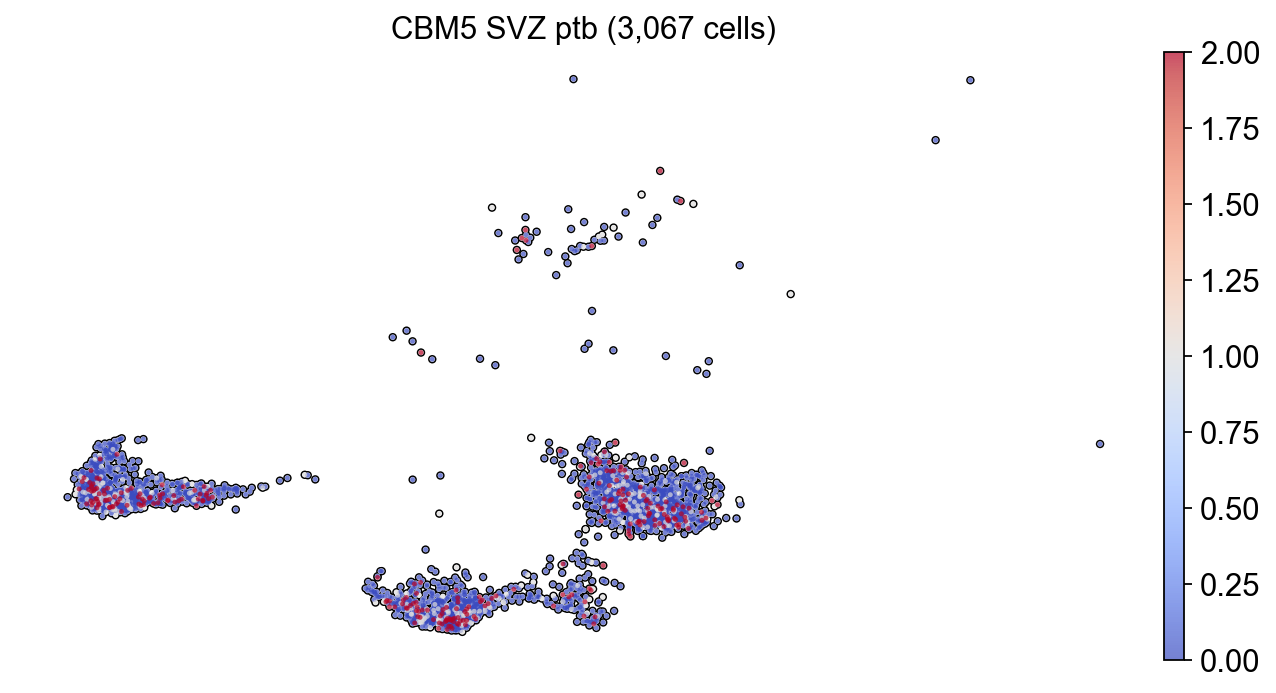

In [7]:
cbm5_ptbj.umap("Ptbp1", vmax=2, fig=(10,5))

/Users/kjenie/Programming/activation_of_quiescent_neurogenic_niches_of_aging_brain/Class/jenie.py:972: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.data.obs["x"] = "x"
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


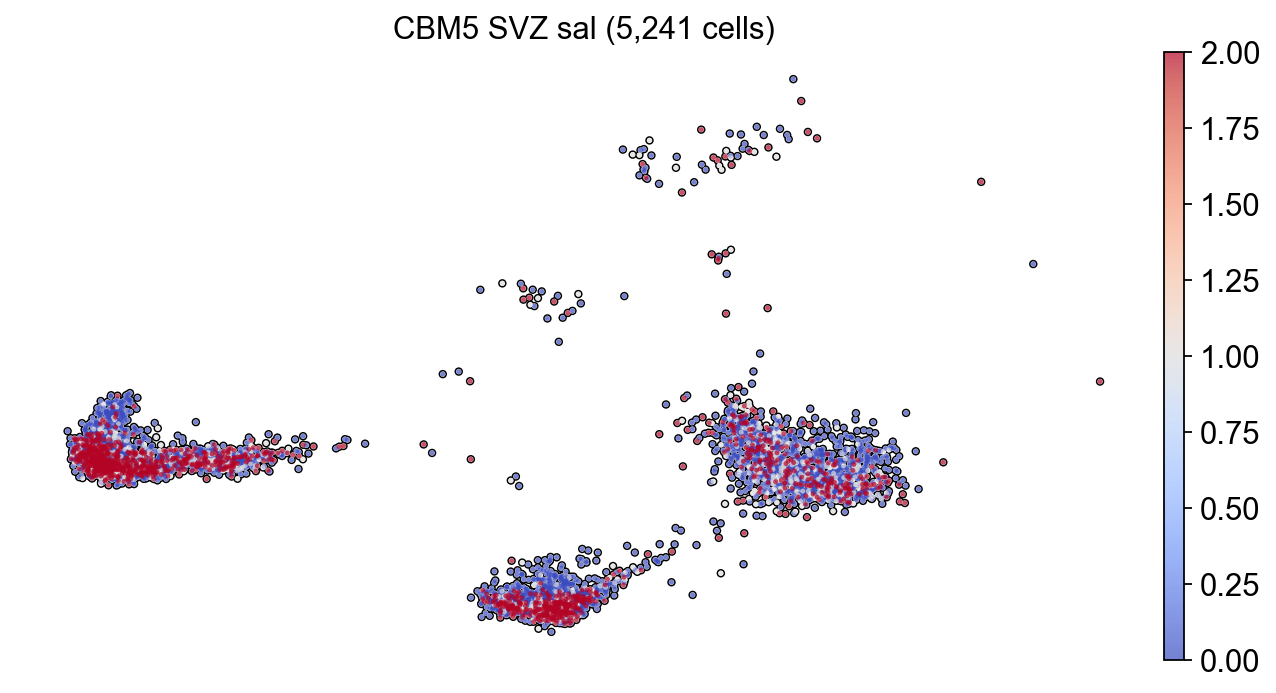

In [8]:
cbm5_salj.umap("Ptbp1", vmax=2, fig=(10,5))

# Figure E, F, G, H

Quantification of mRNA levels of PTBP1, REST, RTN4, and DCX in hippocampal astrocytes , ventricular astrocytes , choroid plexus, and ependymal cells from 1 year old saline or PTBP1-ASO treated mice.

In [9]:
cbm5 = sc.read("../DataF/fig2/CBM5_new_PTB.h5ad")

In [23]:
df_melted

,Treatment,variable,value
0,PTB-ASO,Ptbp1,0
1,PTB-ASO,Ptbp1,0
2,PTB-ASO,Ptbp1,0
3,PTB-ASO,Ptbp1,0
4,PTB-ASO,Ptbp1,0
...,...,...,...
15030,PTB-ASO,Clasp1,3
15031,PTB-ASO,Clasp1,28
15032,PTB-ASO,Clasp1,46
15033,PTB-ASO,Clasp1,0


In [112]:
import matplotlib.pyplot as plt
import numpy as np

data_sets = cbm5
labels = ["Hippocampal astrocytes", "Ependymal cells", "Subpial mature astrocytes","Progenitor cells", ]
colors = ['blue','orange']

def plot_vert_hist(data_sets = data_sets,labels=labels,colors=colors,number_of_bins=10,min_=None,max_=None,normalize_each_dataset=True, fig=(6,6), title=""):

    # Computed quantities to aid plotting
    hist_range = (np.min([e for d in data_sets for e in d]), np.max([e for d in data_sets for e in d]))
    hist_range_ = [min_,max_]
    hist_range = [m if m_ is None else m_ for m,m_ in zip(hist_range,hist_range_)]
    binned_data_sets = [
        np.histogram(d, range=hist_range, bins=number_of_bins)[0]
        for d in data_sets
    ]

    
    if normalize_each_dataset:
        binned_maximums = np.max(binned_data_sets, axis=1)
        binned_data_sets = binned_data_sets/binned_maximums[:,np.newaxis]
    binned_maximums = np.max(binned_data_sets, axis=1)
    x_locations = np.arange(0, sum(binned_maximums), np.max(binned_maximums))

    # The bin_edges are the same for all of the histograms
    bin_edges = np.linspace(hist_range[0], hist_range[1], number_of_bins + 1)
    heights = np.diff(bin_edges)
    centers = bin_edges[:-1] #+ heights / 2

    # Cycle through and plot each histogram
    fig, ax = plt.subplots(figsize=fig)
    fig.patch.set_facecolor('black')  # Setting the figure background to black
    ax.set_facecolor('black')         # Setting the axis background to black

    i = 0
    tot = 0
    for idata,(x_loc, binned_data) in enumerate(zip(x_locations, binned_data_sets)):
        i += 1
        lefts = x_loc - 0.5 * binned_data + tot

        if i == 2:
            tot += 0.5
            i = 0
        c = colors[idata%len(colors)]
        keep  = binned_data!=0
        ax.barh(centers[keep], binned_data[keep], height=heights[keep], left=lefts[keep],color=c,edgecolor='gray')
    ax.set_xticks(x_locations, labels)
    ax.set_ylabel("Data values", color='white')
    ax.set_xlabel("Data sets", color='white')
    ax.set_title(title, color='white')


    # Changing the color of the ticks to white
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    # Optionally, set the color of the tick labels directly
    for label in ax.get_xticklabels():
        label.set_color('white')
    for label in ax.get_yticklabels():
        label.set_color('white')
    spines_to_keep = ['bottom', 'left']
    for spine in spines_to_keep:
        ax.spines[spine].set_color('white')


    return fig


In [113]:
data_sets

AnnData object with n_obs × n_vars = 152568 × 223
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'leiden_denovo', 'Experiment', 'Age', 'Section', 'Mouse', 'Treatment', 'Timepoint', 'Ptbp1', 'MERFISH celltype', 'New_PTB'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Mouse_colors', 'Section_colors', 'Treatment_colors', 'leiden', 'leiden_colors', 'leiden_denovo_colors', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'X_umap_denovo', 'rep'
    varm: 'PCs'
    layers: 'Raw counts'
    obsp: 'connectivities', 'distances'

In [114]:
def get_data(cell):
        

    data = cbm5
    counts = []


    d= data[data.obs["MERFISH celltype"] == cell]
    dsal = d[d.obs["Treatment"] == "Saline"]
    dptb = d[d.obs["Treatment"] == "PTB-ASO"]

    counts.append(dsal.obs["New_PTB"])
    counts.append(dptb.obs["New_PTB"])

    dfsal = pd.DataFrame(dsal.layers["Raw counts"], index=dsal.to_df().index, columns=dsal.to_df().columns)
    dfptb = pd.DataFrame(dptb.layers["Raw counts"], index=dptb.to_df().index, columns=dptb.to_df().columns)

    counts.append(dfsal["Rest"])
    counts.append(dfptb["Rest"])

    counts.append(dfsal["Rtn4"])
    counts.append(dfptb["Rtn4"])

    counts.append(dfsal["Dcx"])
    counts.append(dfptb["Dcx"])

    return counts




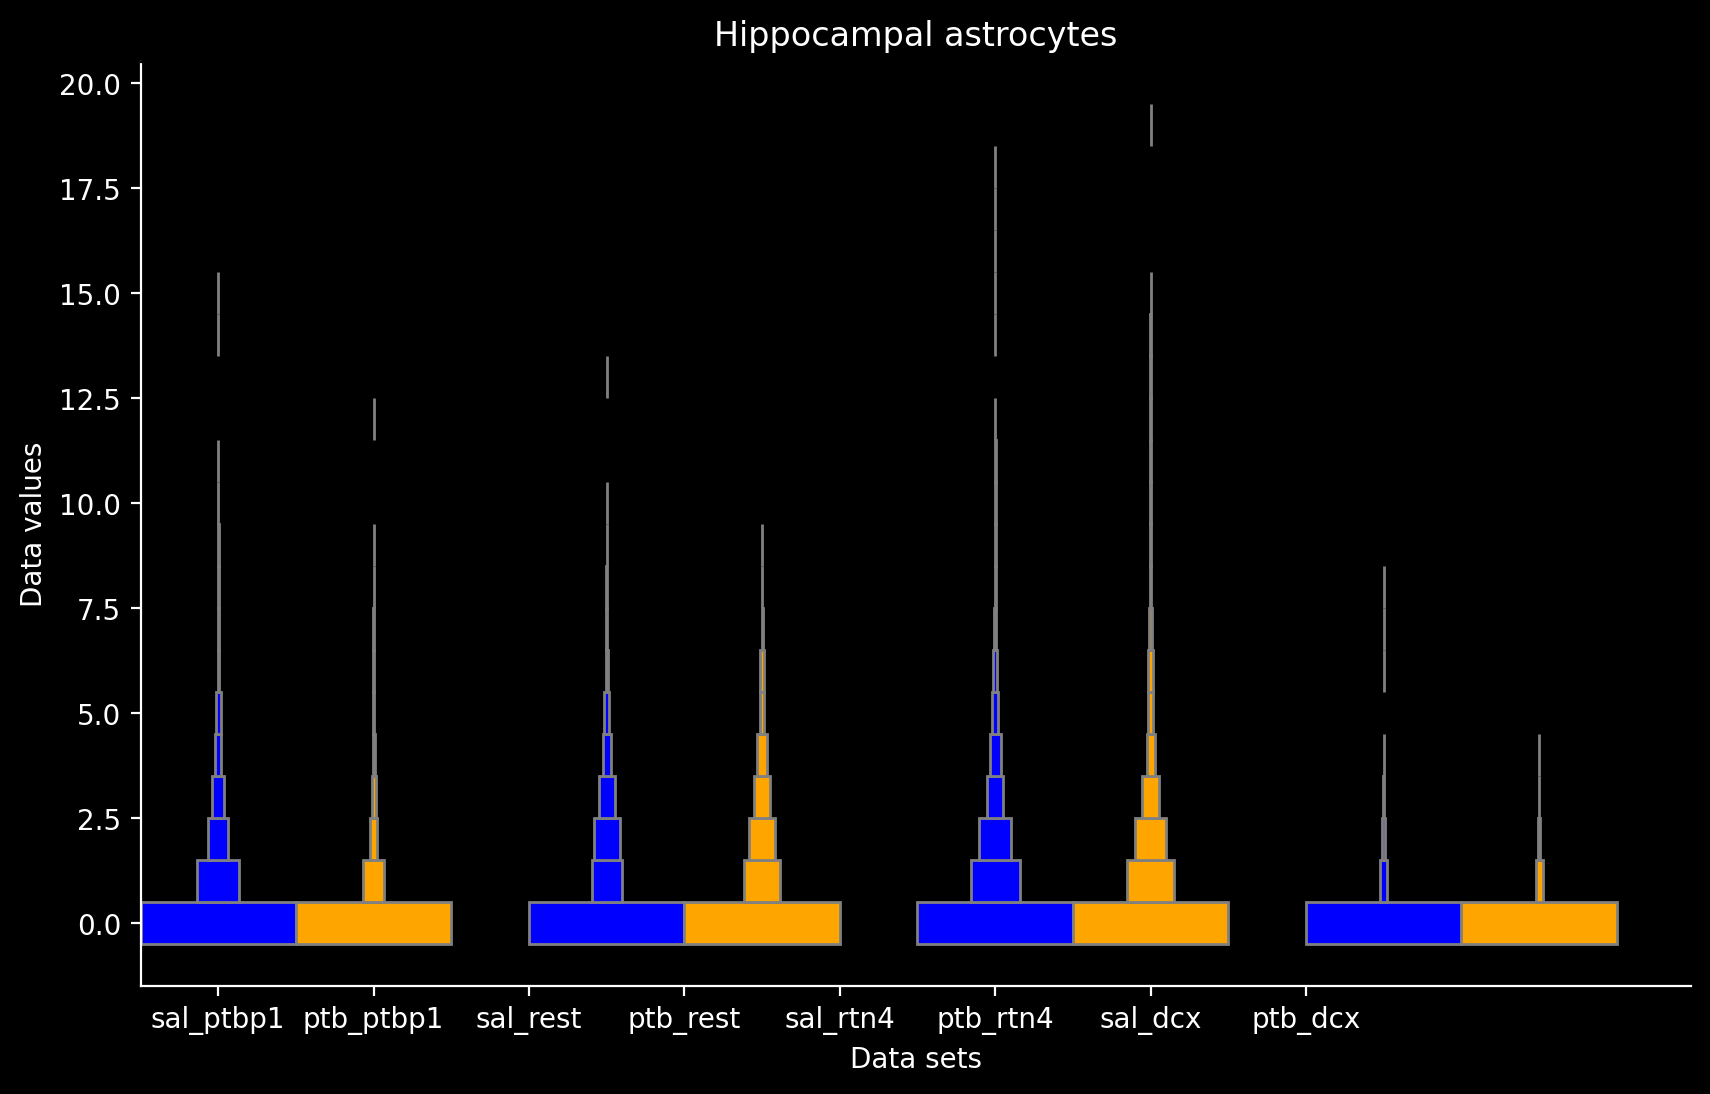

In [116]:
labels = ["sal_ptbp1", "ptb_ptbp1", "sal_rest", "ptb_rest", "sal_rtn4", "ptb_rtn4", "sal_dcx", "ptb_dcx"]
cells = ["Hippocampal astrocytes", "Ependymal cells", "Subpial mature astrocytes","Progenitor cells", ]

colors = ['blue','orange']
fig = plot_vert_hist(data_sets = get_data(cells[0]),labels=labels,colors=colors,min_=0,max_=20,number_of_bins=20, fig=(10,6), title=cells[0])

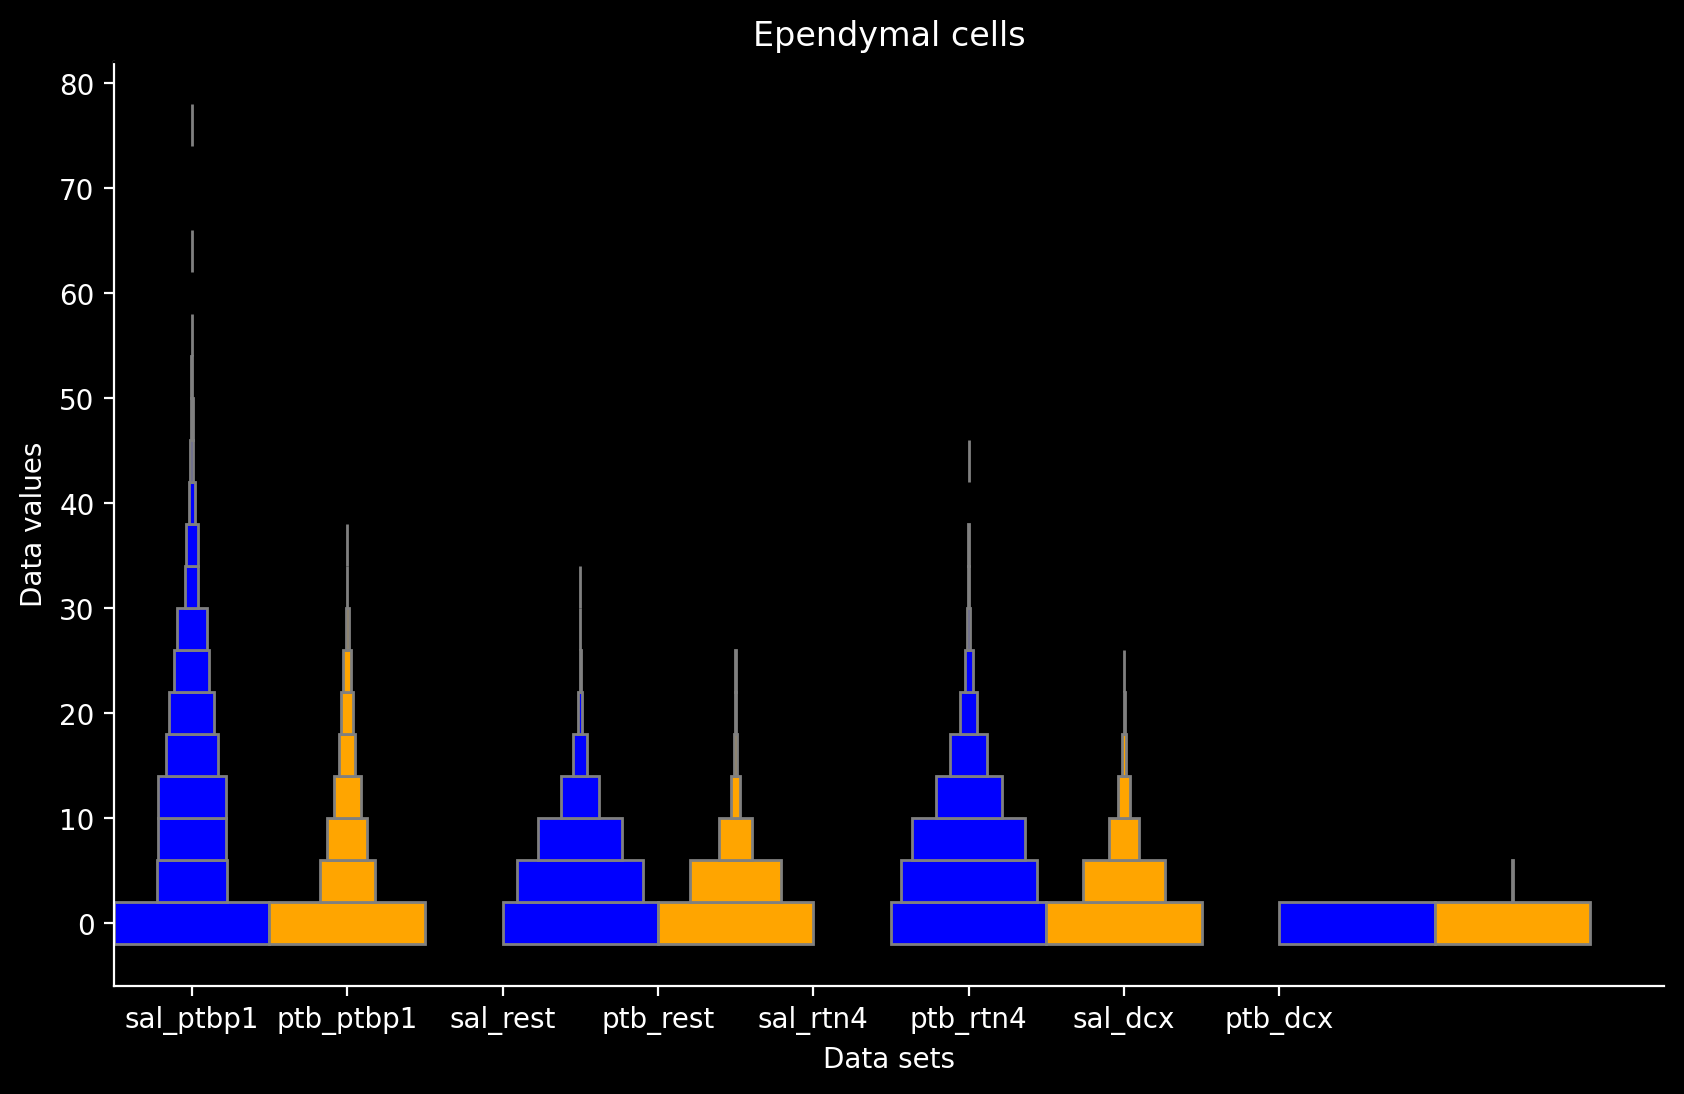

In [119]:
fig = plot_vert_hist(data_sets = get_data(cells[1]),labels=labels,colors=colors,min_=0,max_=None,number_of_bins=20, fig=(10,6), title=cells[1])


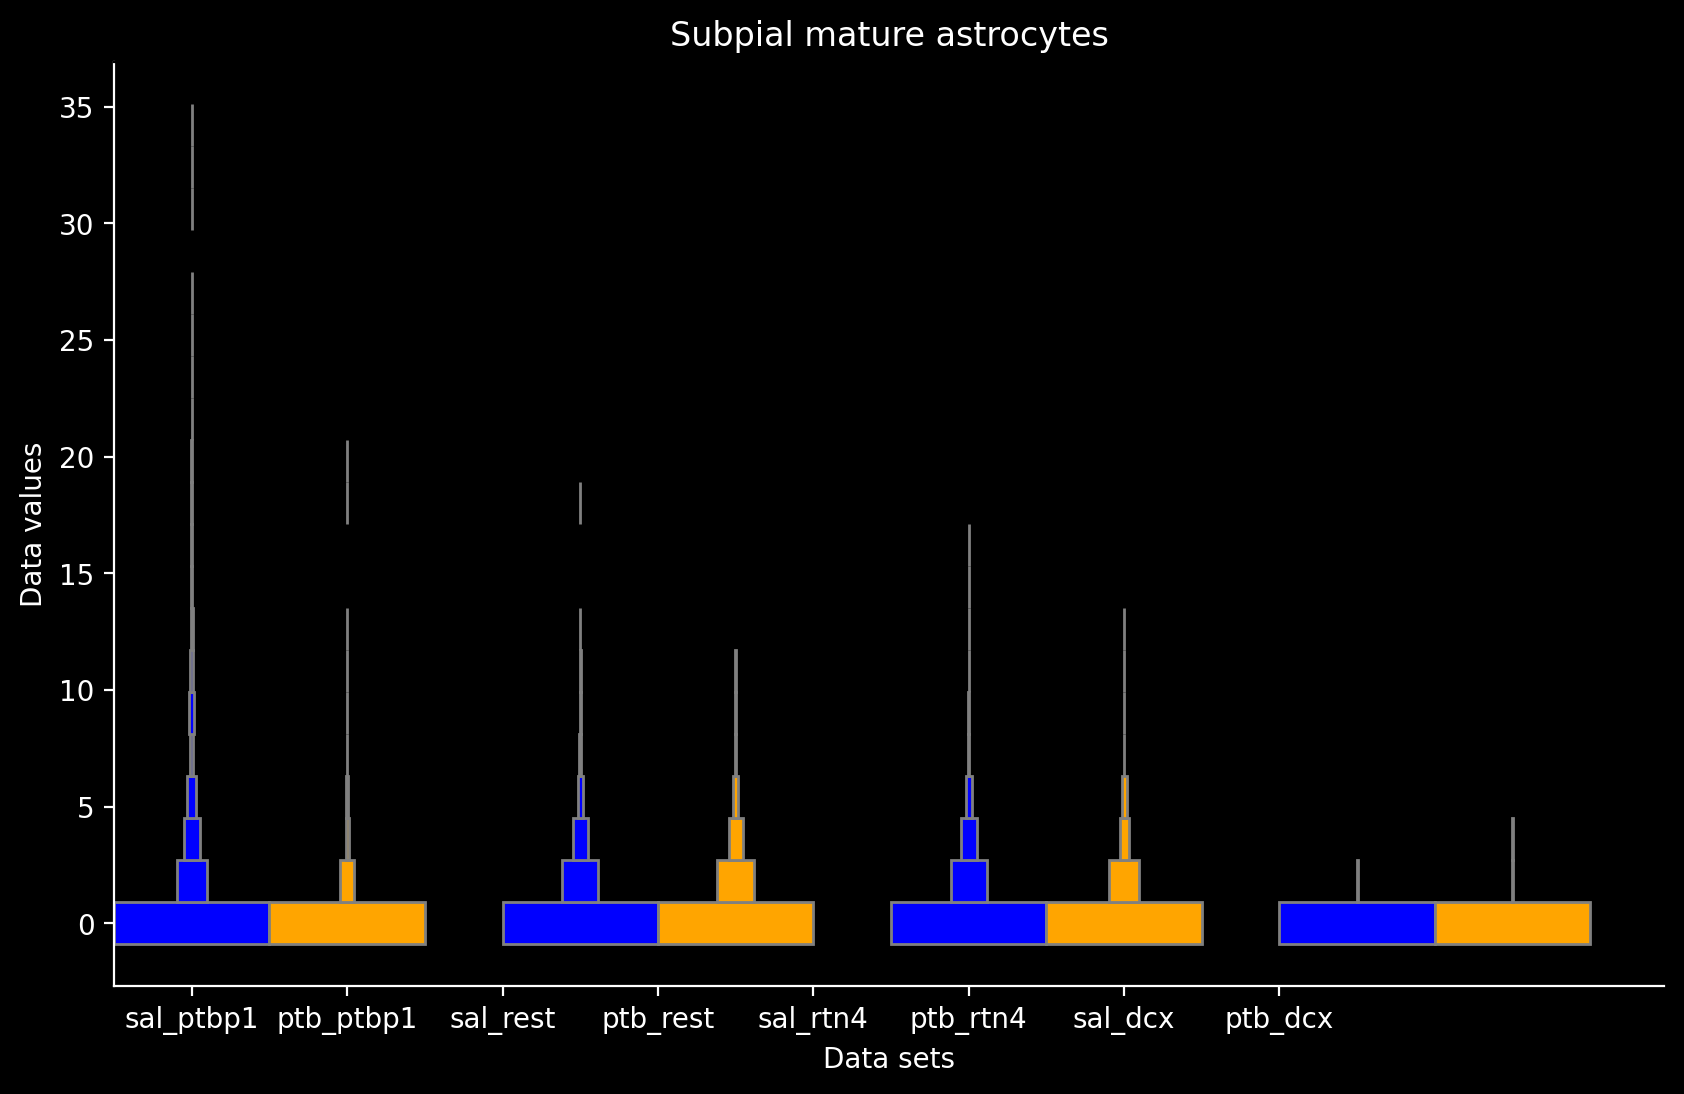

In [120]:
fig = plot_vert_hist(data_sets = get_data(cells[2]),labels=labels,colors=colors,min_=0,max_=None,number_of_bins=20, fig=(10,6), title=cells[2])


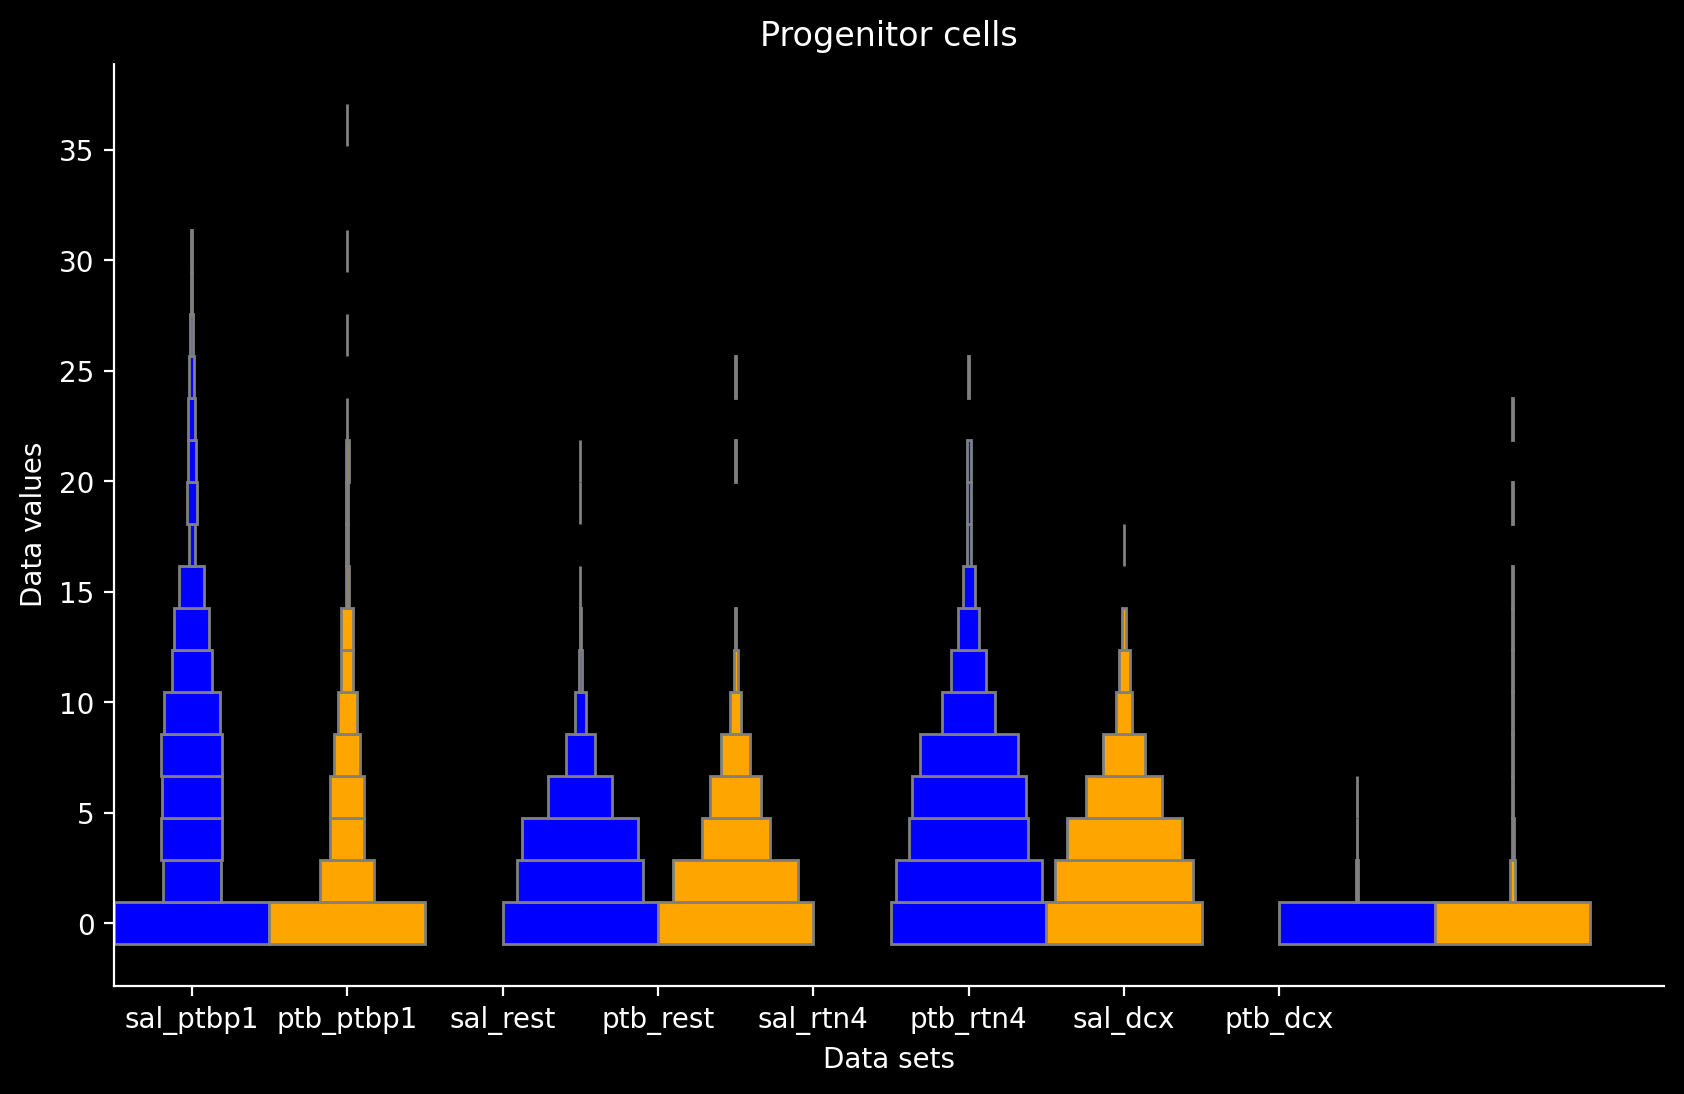

In [121]:
fig = plot_vert_hist(data_sets = get_data(cells[3]),labels=labels,colors=colors,min_=0,max_=None,number_of_bins=20, fig=(10,6), title=cells[3])


In [52]:
df["Ptbp1"].tolist()

[0.5,
 0.5,
 2.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 1.5,
 0.5,
 0.5,
 0.5,
 0.5,
 1.5,
 0.5,
 0.5,
 0.5,
 0.5,
 1.5,
 0.5,
 0.5,
 0.5,
 2.5,
 0.5,
 0.5,
 0.5,
 0.5,
 1.5,
 0.5,
 1.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 1.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 1.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 2.5,
 0.5,
 0.5,
 1.5,
 0.5,
 6.5,
 1.5,
 0.5,
 0.5,
 0.5,
 1.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 3.5,
 0.5,
 0.5,
 2.5,
 0.5,
 0.5,
 1.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 2.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 3.5,
 0.5,
 0.5,
 0.5,
 0.5,
 1.5,
 0.5,
 0.5,
 1.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 1.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 1.5,
 1.5,
 0.5,
 0.5,
 0.5

In [49]:
df_melted

,Treatment,variable,value
0,PTB-ASO,Ptbp1,0.5
1,PTB-ASO,Ptbp1,0.5
2,PTB-ASO,Ptbp1,2.5
3,PTB-ASO,Ptbp1,0.5
4,PTB-ASO,Ptbp1,0.5
...,...,...,...
21391,PTB-ASO,Dcx,0.0
21392,PTB-ASO,Dcx,0.0
21393,PTB-ASO,Dcx,0.0
21394,PTB-ASO,Dcx,0.0


In [143]:
data = cbm5
counts = []
cell = "Progenitor cells"


d= data[data.obs["MERFISH celltype"] == cell]




In [144]:
d = d[d.obs["New_PTB"] >= d.obs["New_PTB"].mean()]
d

View of AnnData object with n_obs × n_vars = 912 × 223
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'leiden_denovo', 'Experiment', 'Age', 'Section', 'Mouse', 'Treatment', 'Timepoint', 'Ptbp1', 'MERFISH celltype', 'New_PTB'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Mouse_colors', 'Section_colors', 'Treatment_colors', 'leiden', 'leiden_colors', 'leiden_denovo_colors', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'X_umap_denovo', 'rep'
    varm: 'PCs'
    layers: 'Raw counts'
    obsp: 'connectivities', 'distances'

In [145]:
counts = []

In [146]:
dsal = d[d.obs["Treatment"] == "Saline"]
dptb = d[d.obs["Treatment"] == "PTB-ASO"]

counts.append(dsal.obs["New_PTB"])
counts.append(dptb.obs["New_PTB"])

dfsal = pd.DataFrame(dsal.layers["Raw counts"], index=dsal.to_df().index, columns=dsal.to_df().columns)
dfptb = pd.DataFrame(dptb.layers["Raw counts"], index=dptb.to_df().index, columns=dptb.to_df().columns)

counts.append(dfsal["Rest"])
counts.append(dfptb["Rest"])

counts.append(dfsal["Rtn4"])
counts.append(dfptb["Rtn4"])

counts.append(dfsal["Dcx"])
counts.append(dfptb["Dcx"])


In [147]:
counts

[cell_id
 3890230    13
 3900004    27
 3900017    10
 3900024     8
 3900025    12
            ..
 9120148     9
 9130003     8
 9130033    21
 9230044    12
 9230131    13
 Name: New_PTB, Length: 696, dtype: int64,
 cell_id
 1500037      7
 1500044     10
 1500063      7
 1510025     14
 1510030     14
             ..
 11430123     7
 11430131     7
 11430137     8
 11430162    13
 11520088    20
 Name: New_PTB, Length: 216, dtype: int64,
 cell_id
 3890230    1
 3900004    3
 3900017    7
 3900024    9
 3900025    7
           ..
 9120148    3
 9130003    6
 9130033    2
 9230044    9
 9230131    1
 Name: Rest, Length: 696, dtype: int64,
 cell_id
 1500037      7
 1500044      6
 1500063      5
 1510025      1
 1510030      7
             ..
 11430123     0
 11430131     2
 11430137     6
 11430162    10
 11520088     5
 Name: Rest, Length: 216, dtype: int64,
 cell_id
 3890230     6
 3900004     6
 3900017     8
 3900024    14
 3900025     3
            ..
 9120148     7
 9130003     

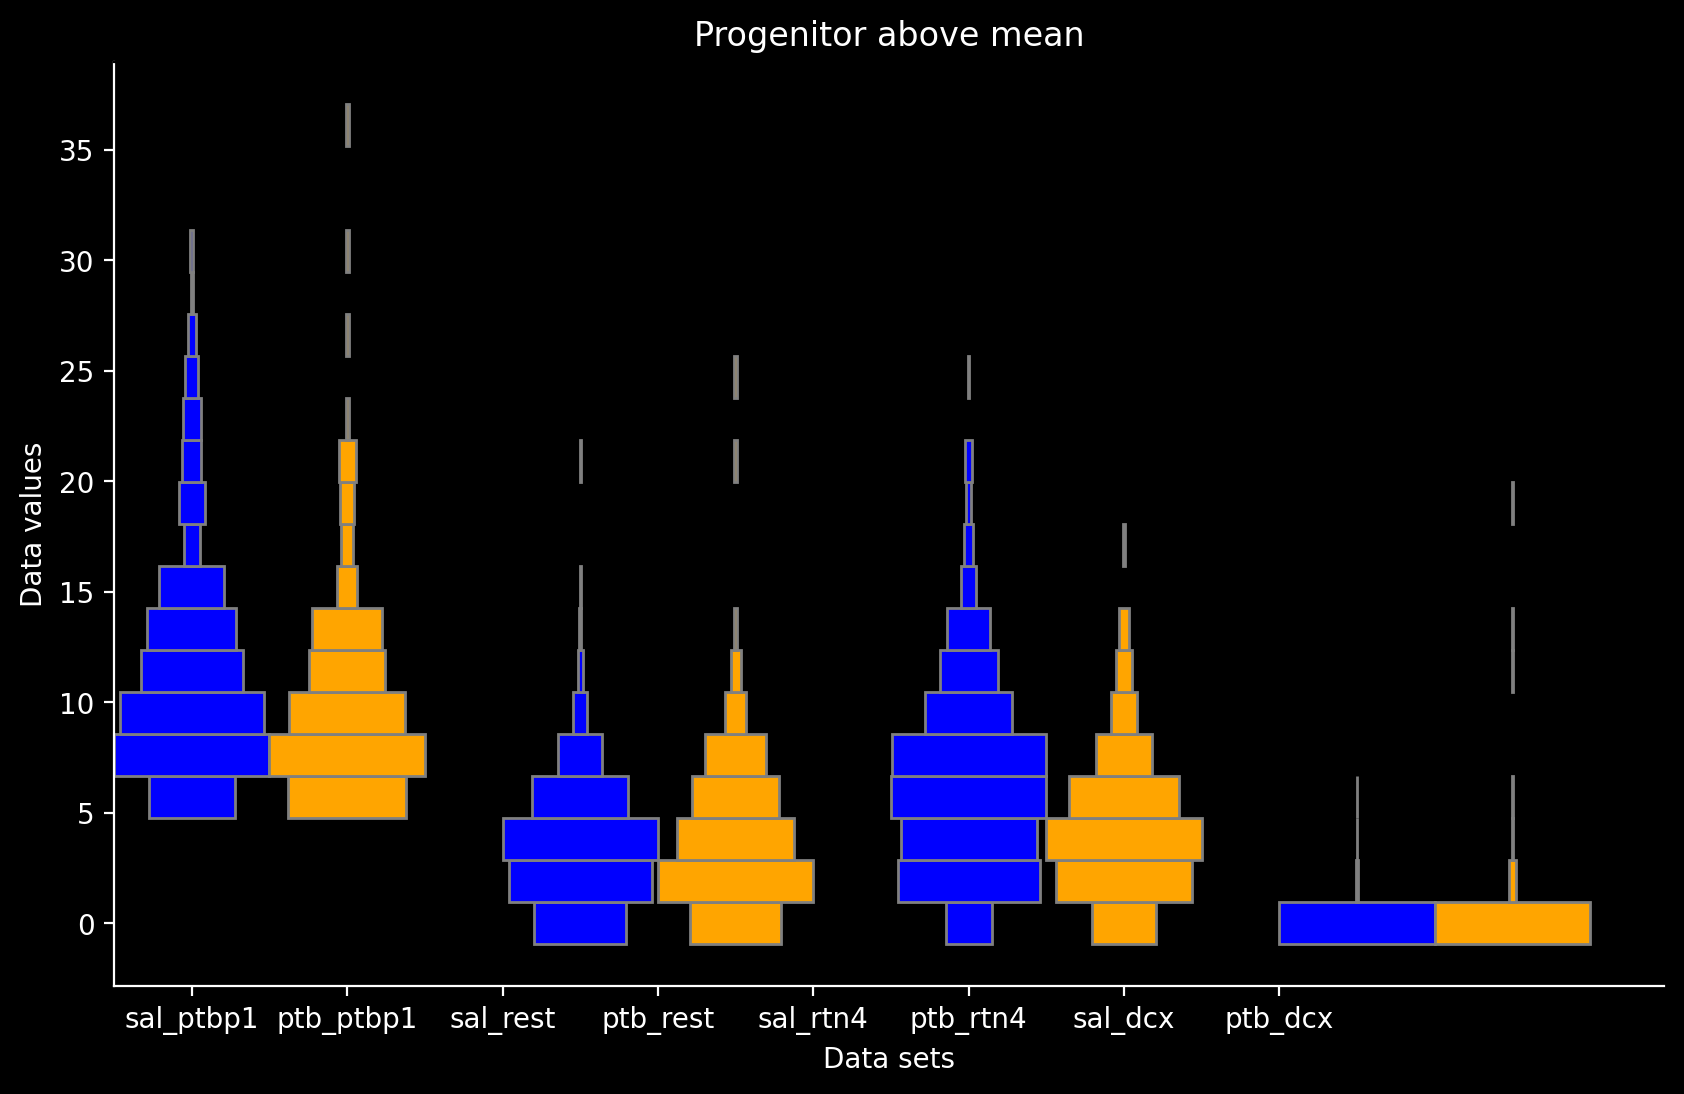

In [148]:
fig = plot_vert_hist(data_sets = counts,labels=labels,colors=colors,min_=0,max_=None,number_of_bins=20, fig=(10,6), title="Progenitor above mean")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 64]), array([3825,  765,  333,  194,   94,   65,   24,   21,   10,    8,    4,
          1,    1,    2,    1,    1]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51,
       52, 54, 56, 58, 66, 80]), array([709, 220, 145, 153, 125, 143, 117, 114, 118, 110, 107, 110, 119,
        96,  95,  85,  71,  69,  69,  82,  72,  59,  56,  52,  51,  52,
        43,  34,  40,  42,  34,  26,  16,  20,  15,  10,  16,  18,  12,
         9,  13,   6,   4,   4,   5,   3,   5,   1,   2,   1,   3,   1,
         2,   1,   1,   1,   1]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 26, 28, 32, 34, 36]), array([2098,  408,  205,  145,   89,   65,   59,   31,   29,   24,   19,
         14,   13,    9

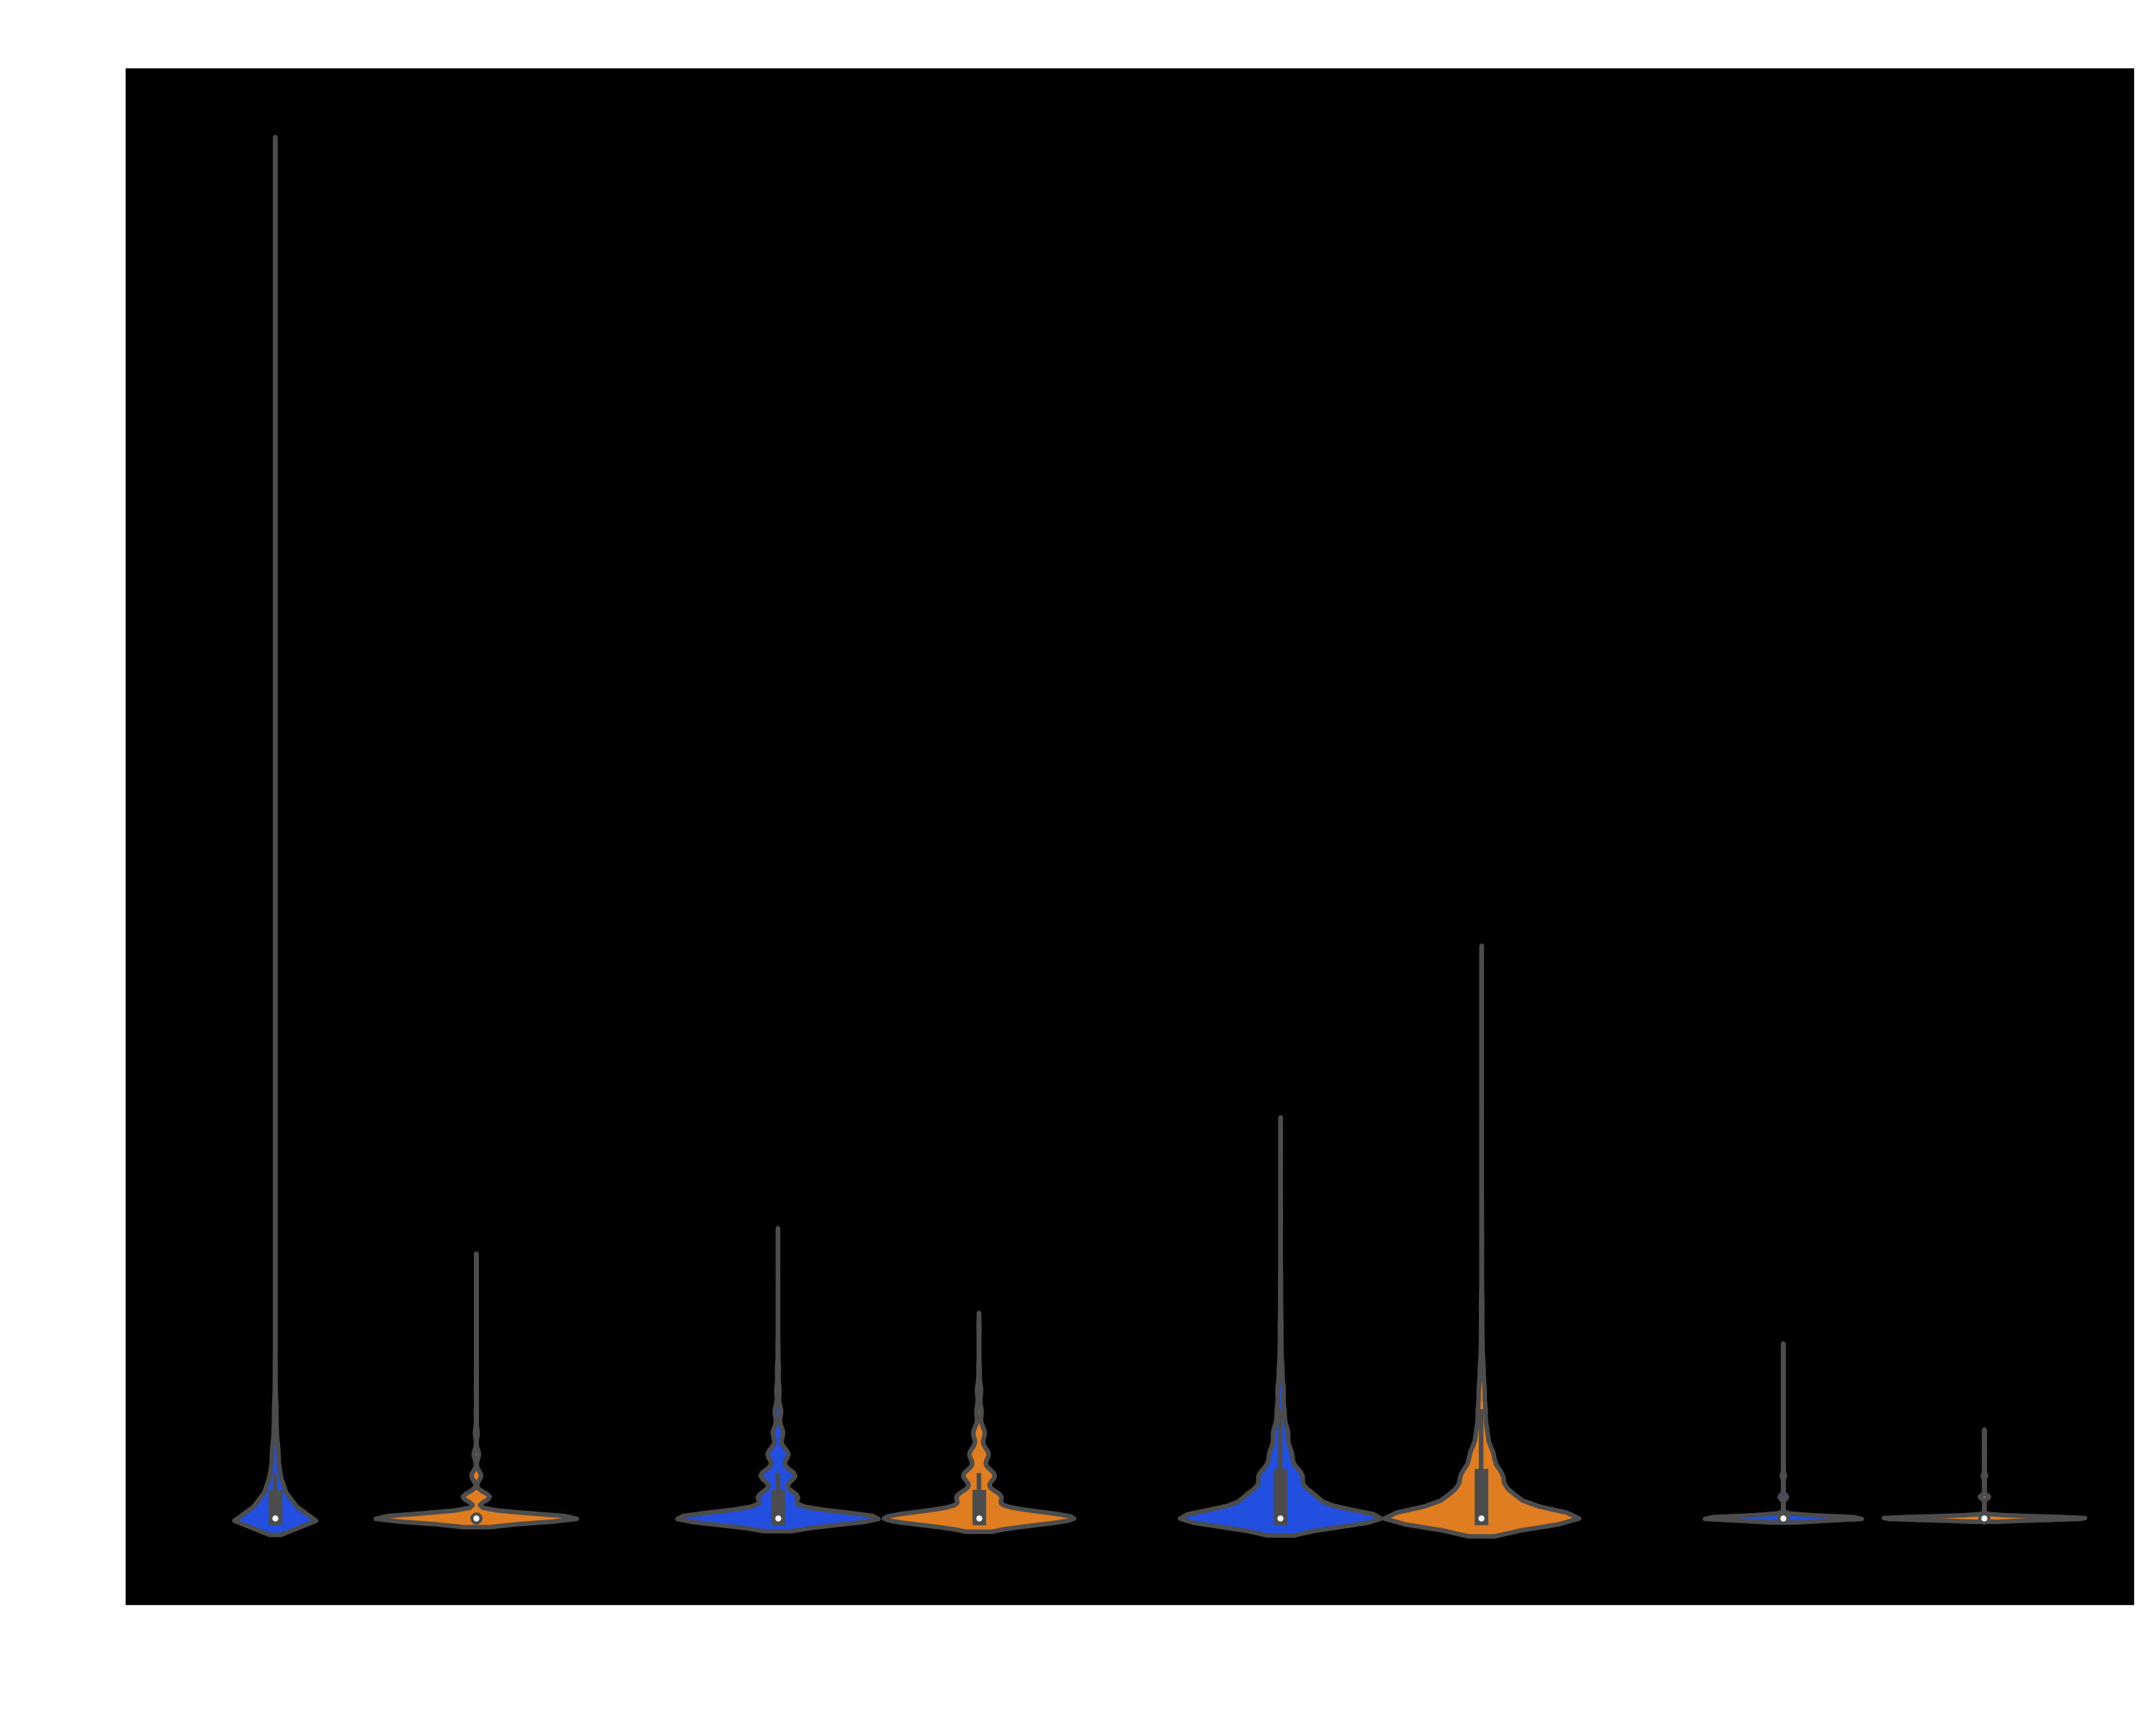

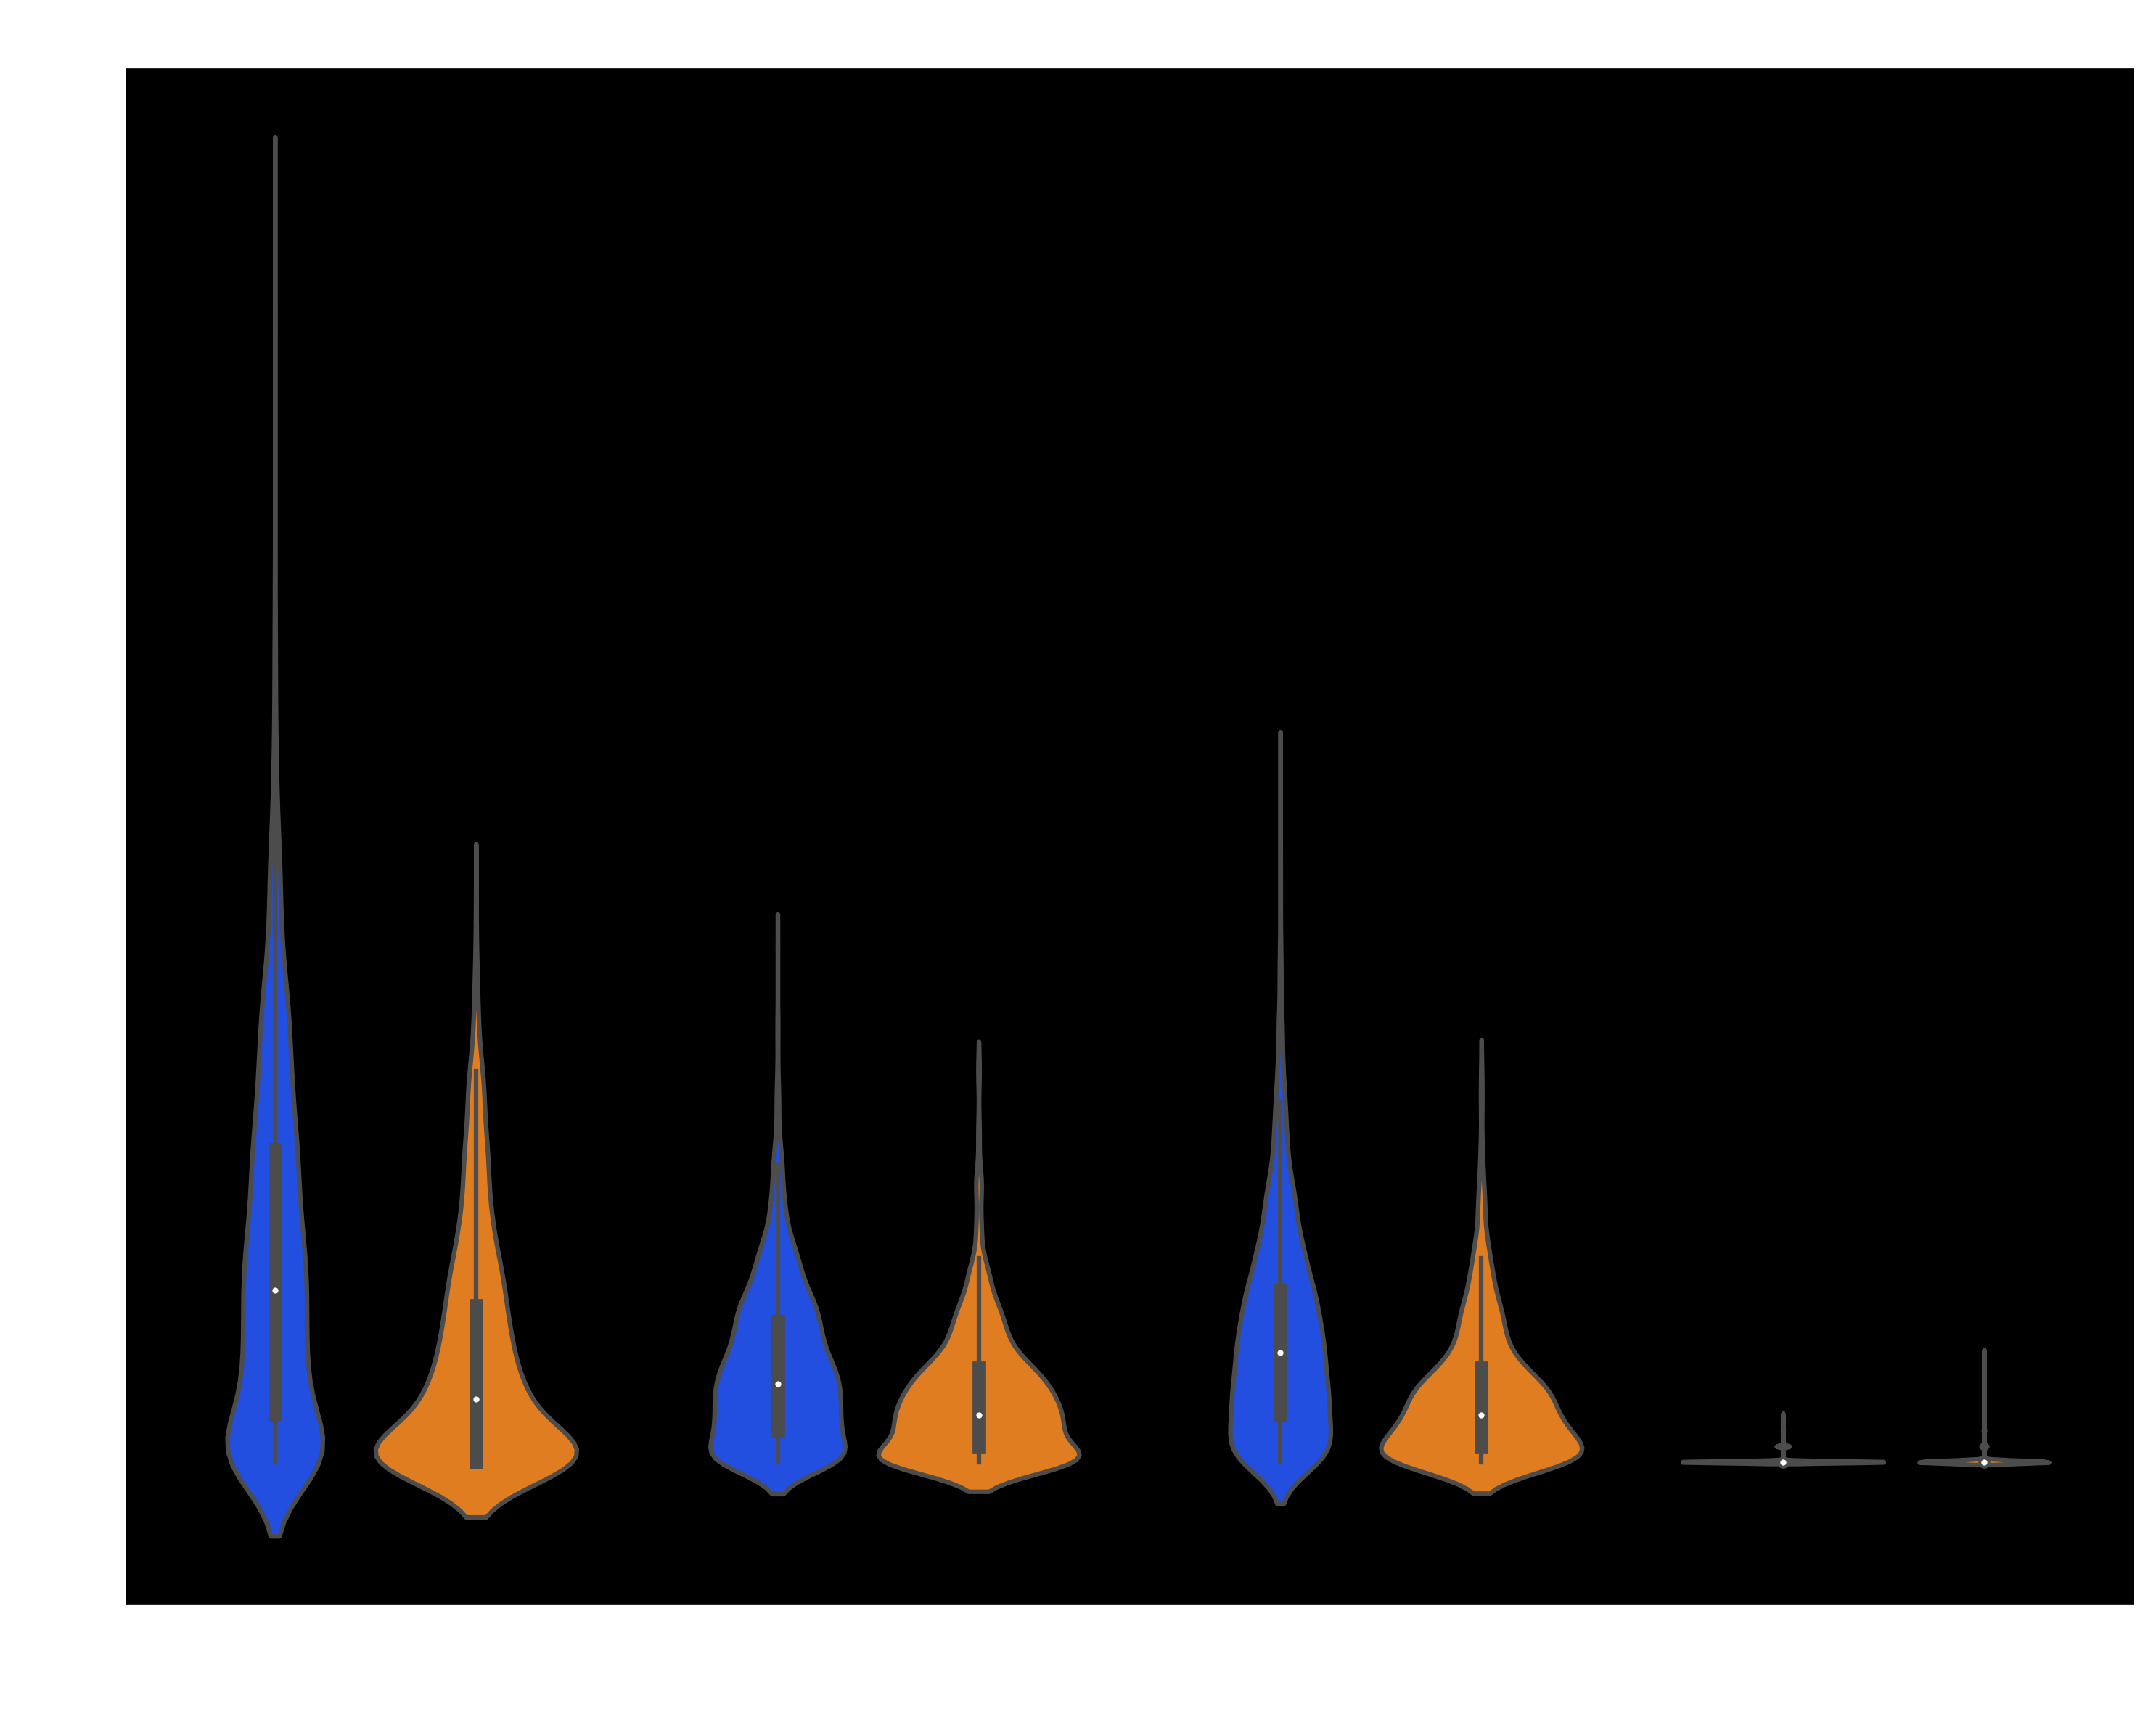

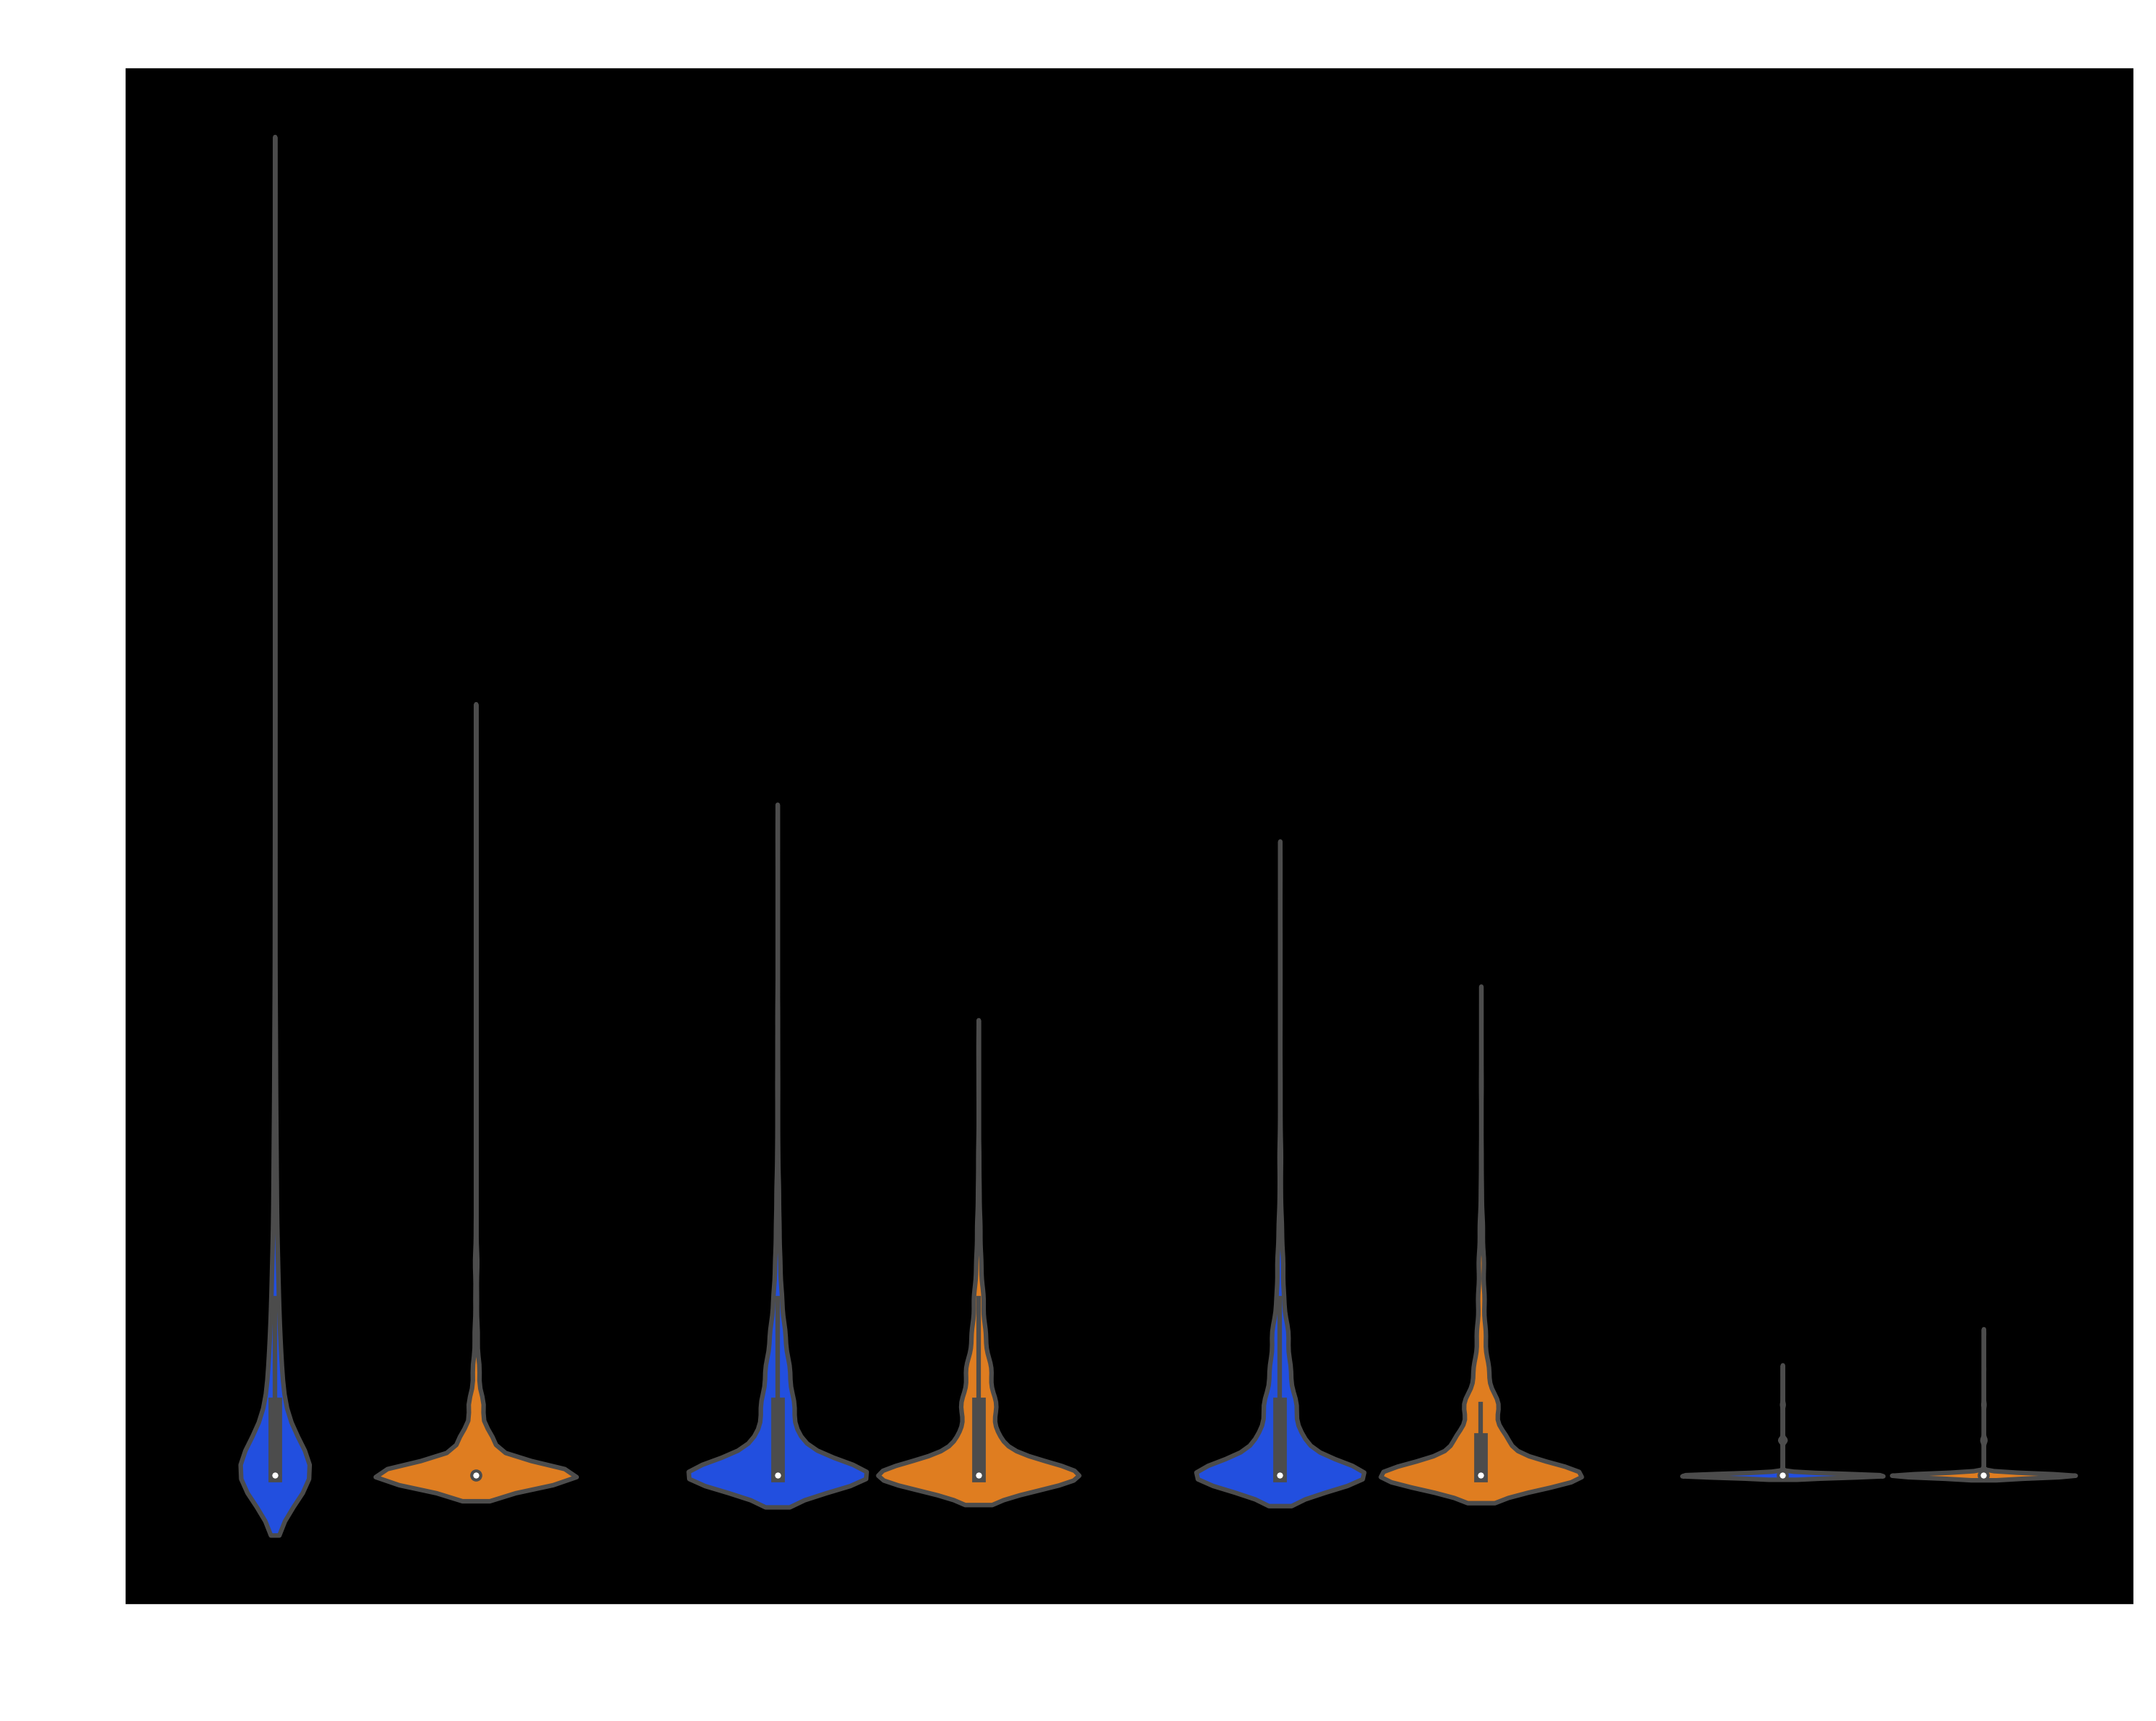

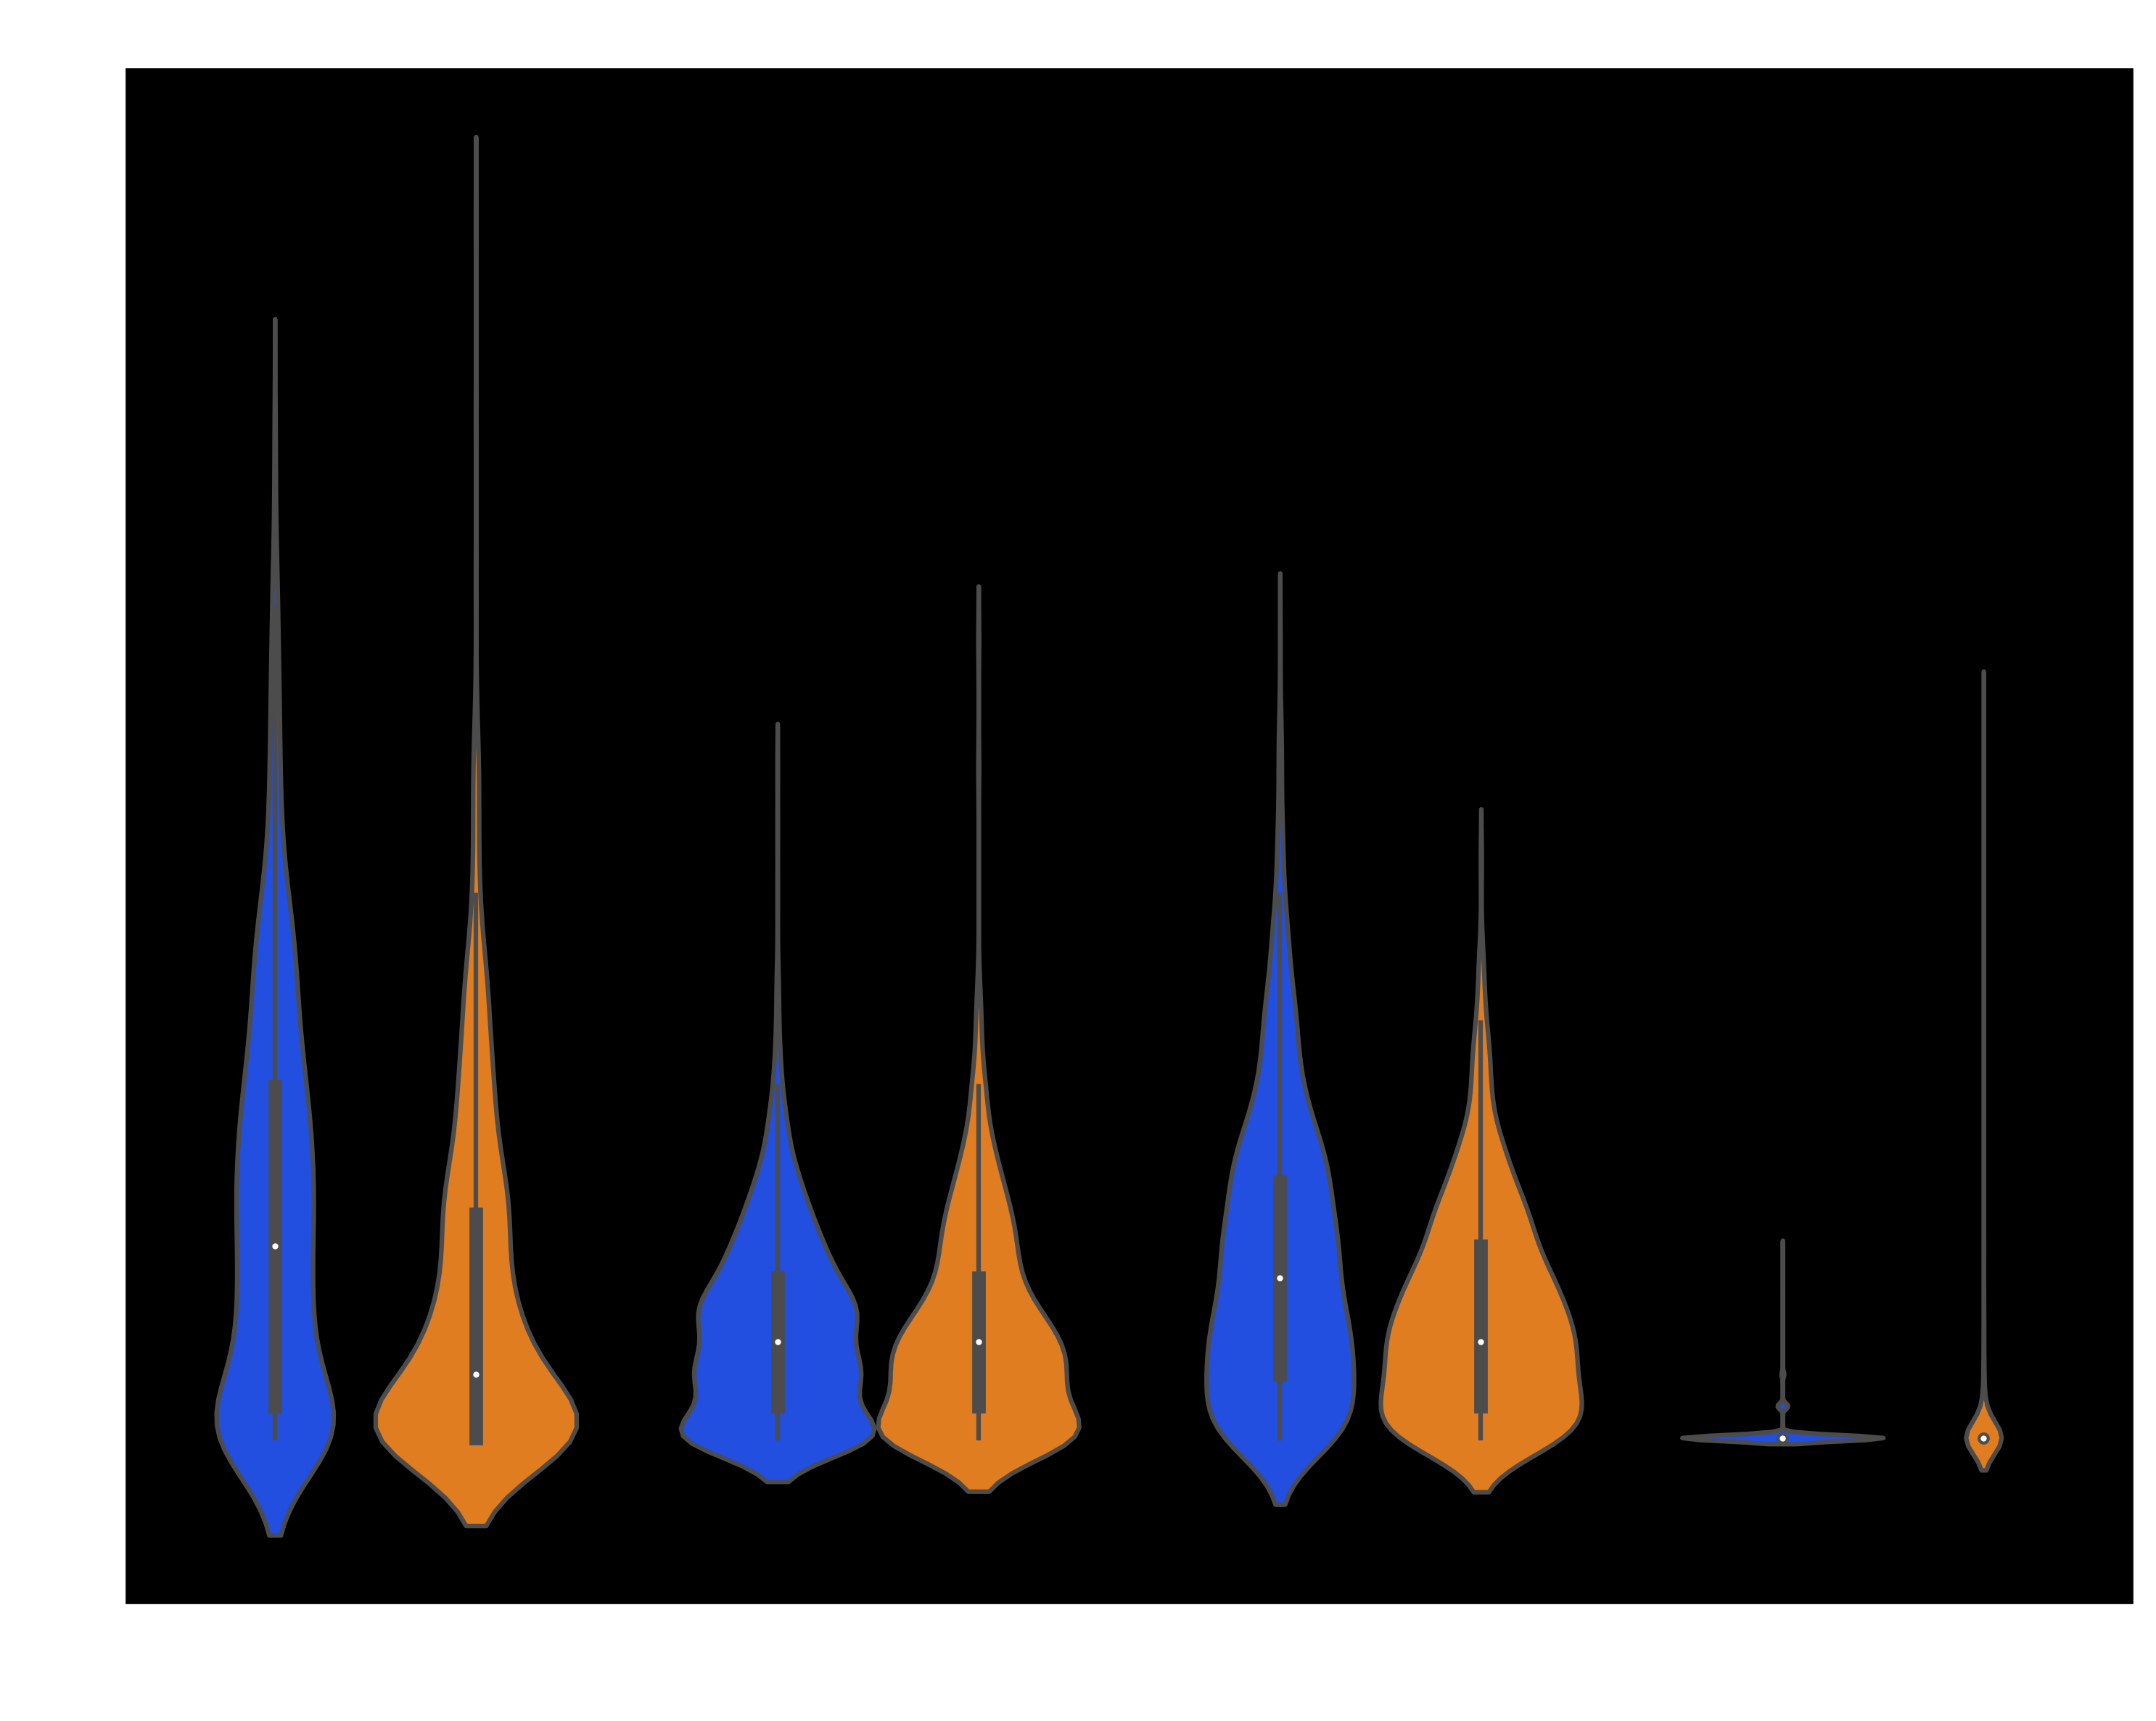

In [153]:
data = cbm5

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("dark_background")

for i, cell in enumerate(["Hippocampal astrocytes", "Ependymal cells", "Subpial mature astrocytes","Progenitor cells", ]):
    fig, axs = plt.subplots(1, 1, figsize=(10, 8), dpi=150, facecolor="w")

    ax = axs
    d= data[data.obs["MERFISH celltype"] == cell]


    df = pd.DataFrame(d.layers["Raw counts"], index=d.to_df().index, columns=d.to_df().columns)
    df["Ptbp1"] = d.obs["New_PTB"] 
    df["Treatment"] = d.obs["Treatment"] 
    df["MERFISH celltype"] = d.obs["MERFISH celltype"]

    

    print(np.unique(df["Ptbp1"], return_counts=True))

    

    # data
    genes = [ 
        "Ptbp1",
        "Rest", 
        "Rtn4",
        "Dcx",
        ]

    df_melted = df.melt(id_vars=['Treatment'], value_vars=genes)
    # sns.boxenplot(data=df_melted, x='variable', y='value', ax=ax, hue='Treatment',showfliers=False, hue_order=["Saline", "PTB-ASO"], palette="bright", k_depth=50)
    sns.violinplot(data=df_melted, x='variable', y='value', ax=ax, hue='Treatment',showfliers=False, hue_order=["Saline", "PTB-ASO"], palette="bright")
    ax.legend([],[], frameon=False)
    ax.set_title(f"{cell}")
    ax.set_xlabel('Gene')
    ax.set_ylabel('Value')
    plt.tight_layout()
    # plt.ylim(0,15)

# plt.savefig("./figures/alsdkjfalskdfja8.png", dpi=300, bbox_inches="tight", transparent=True)

/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_55855/3357686105.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_55855/3357686105.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_55855/3357686105.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


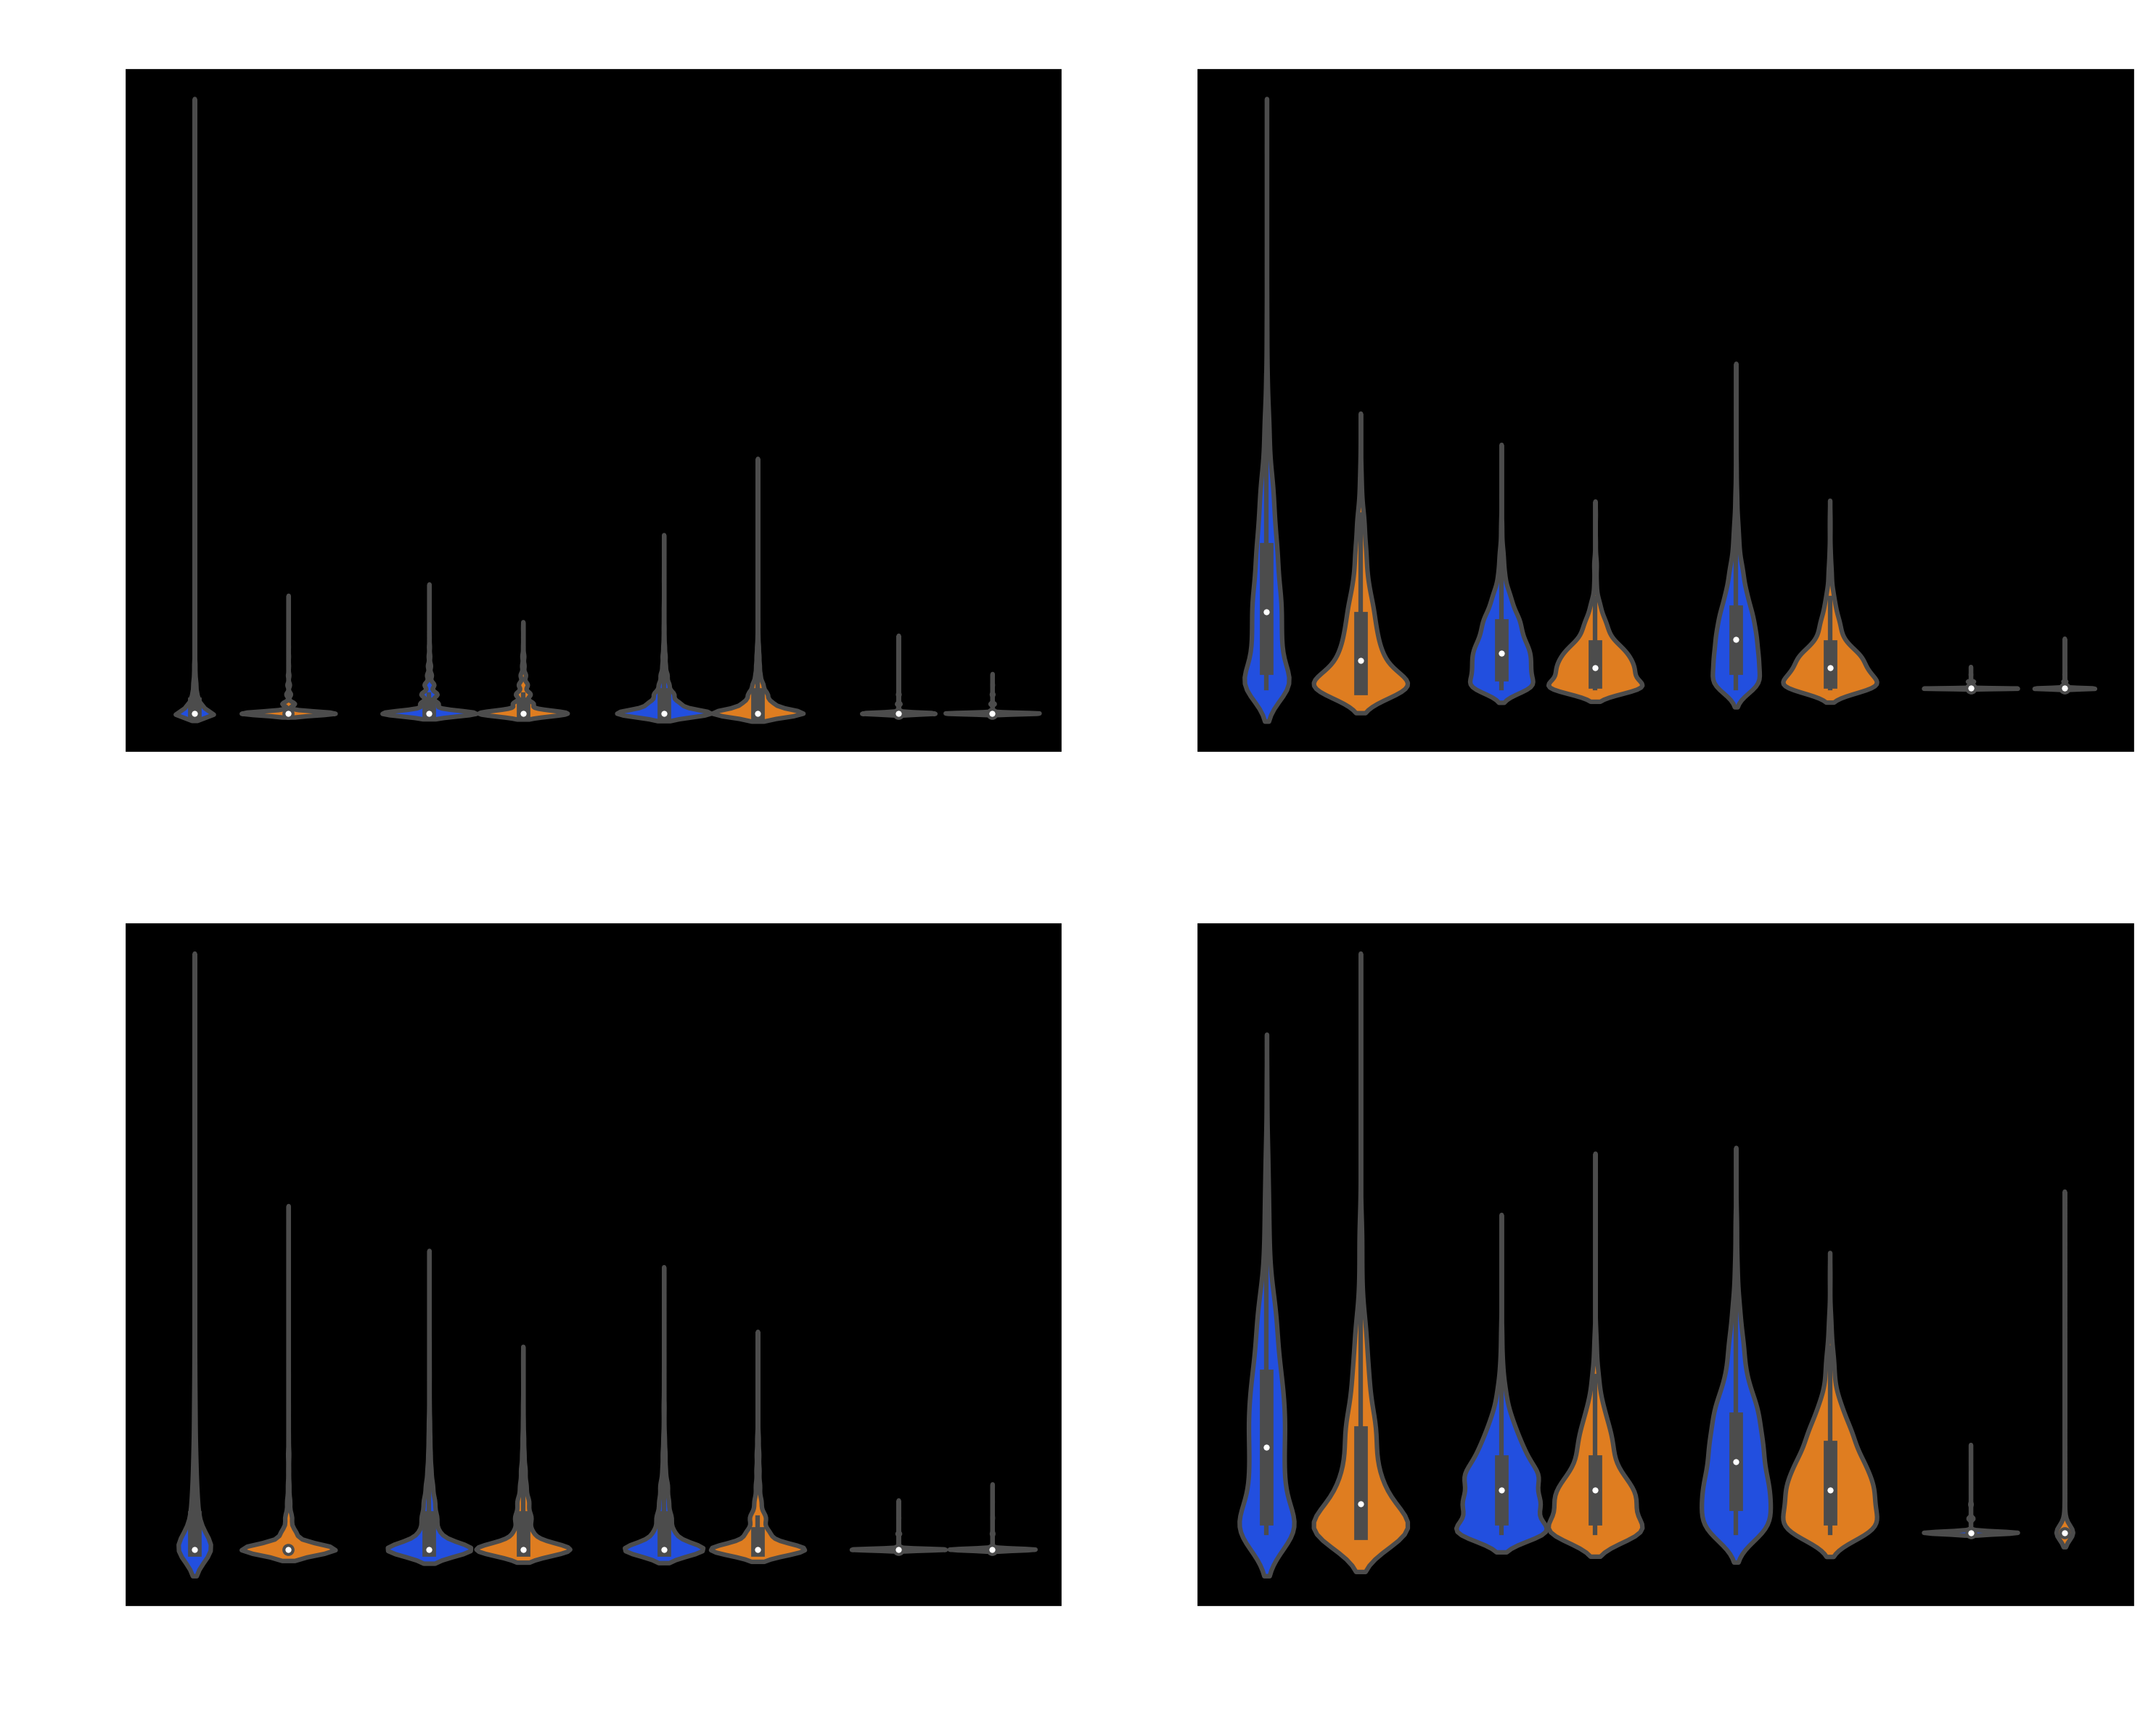

In [160]:
data = cbm5

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("dark_background")

fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=150, facecolor="w")
for i, cell in enumerate(["Hippocampal astrocytes", "Ependymal cells", "Subpial mature astrocytes","Progenitor cells", ]):
    ax = axs[np.unravel_index(i, (2, 2))]
    d= data[data.obs["MERFISH celltype"] == cell]

    df = pd.DataFrame(d.layers["Raw counts"], index=d.to_df().index, columns=d.to_df().columns)
    df["Ptbp1"] = d.obs["New_PTB"]
    df["Treatment"] = d.obs["Treatment"]
    df["MERFISH celltype"] = d.obs["MERFISH celltype"]

    # data
    genes = [ 
        "Ptbp1",
        "Rest", 
        "Rtn4",
        "Dcx",
        ]

    df_melted = df.melt(id_vars=['Treatment'], value_vars=genes)
    # sns.boxenplot(data=df_melted, x='variable', y='value', ax=ax, hue='Treatment',showfliers=False, hue_order=["Saline", "PTB-ASO"], palette="bright", k_depth="full")
    sns.violinplot(data=df_melted, x='variable', y='value', ax=ax, hue='Treatment',showfliers=False, hue_order=["Saline", "PTB-ASO"], palette="bright", k_depth="full")
    ax.legend([],[], frameon=False)
    ax.set_title(f"{cell}")
    ax.set_xlabel('Gene')
    ax.set_ylabel('Value')
    plt.tight_layout()

plt.savefig("./figures/alsdkjfalskdfja8.png", dpi=300, bbox_inches="tight", transparent=True)

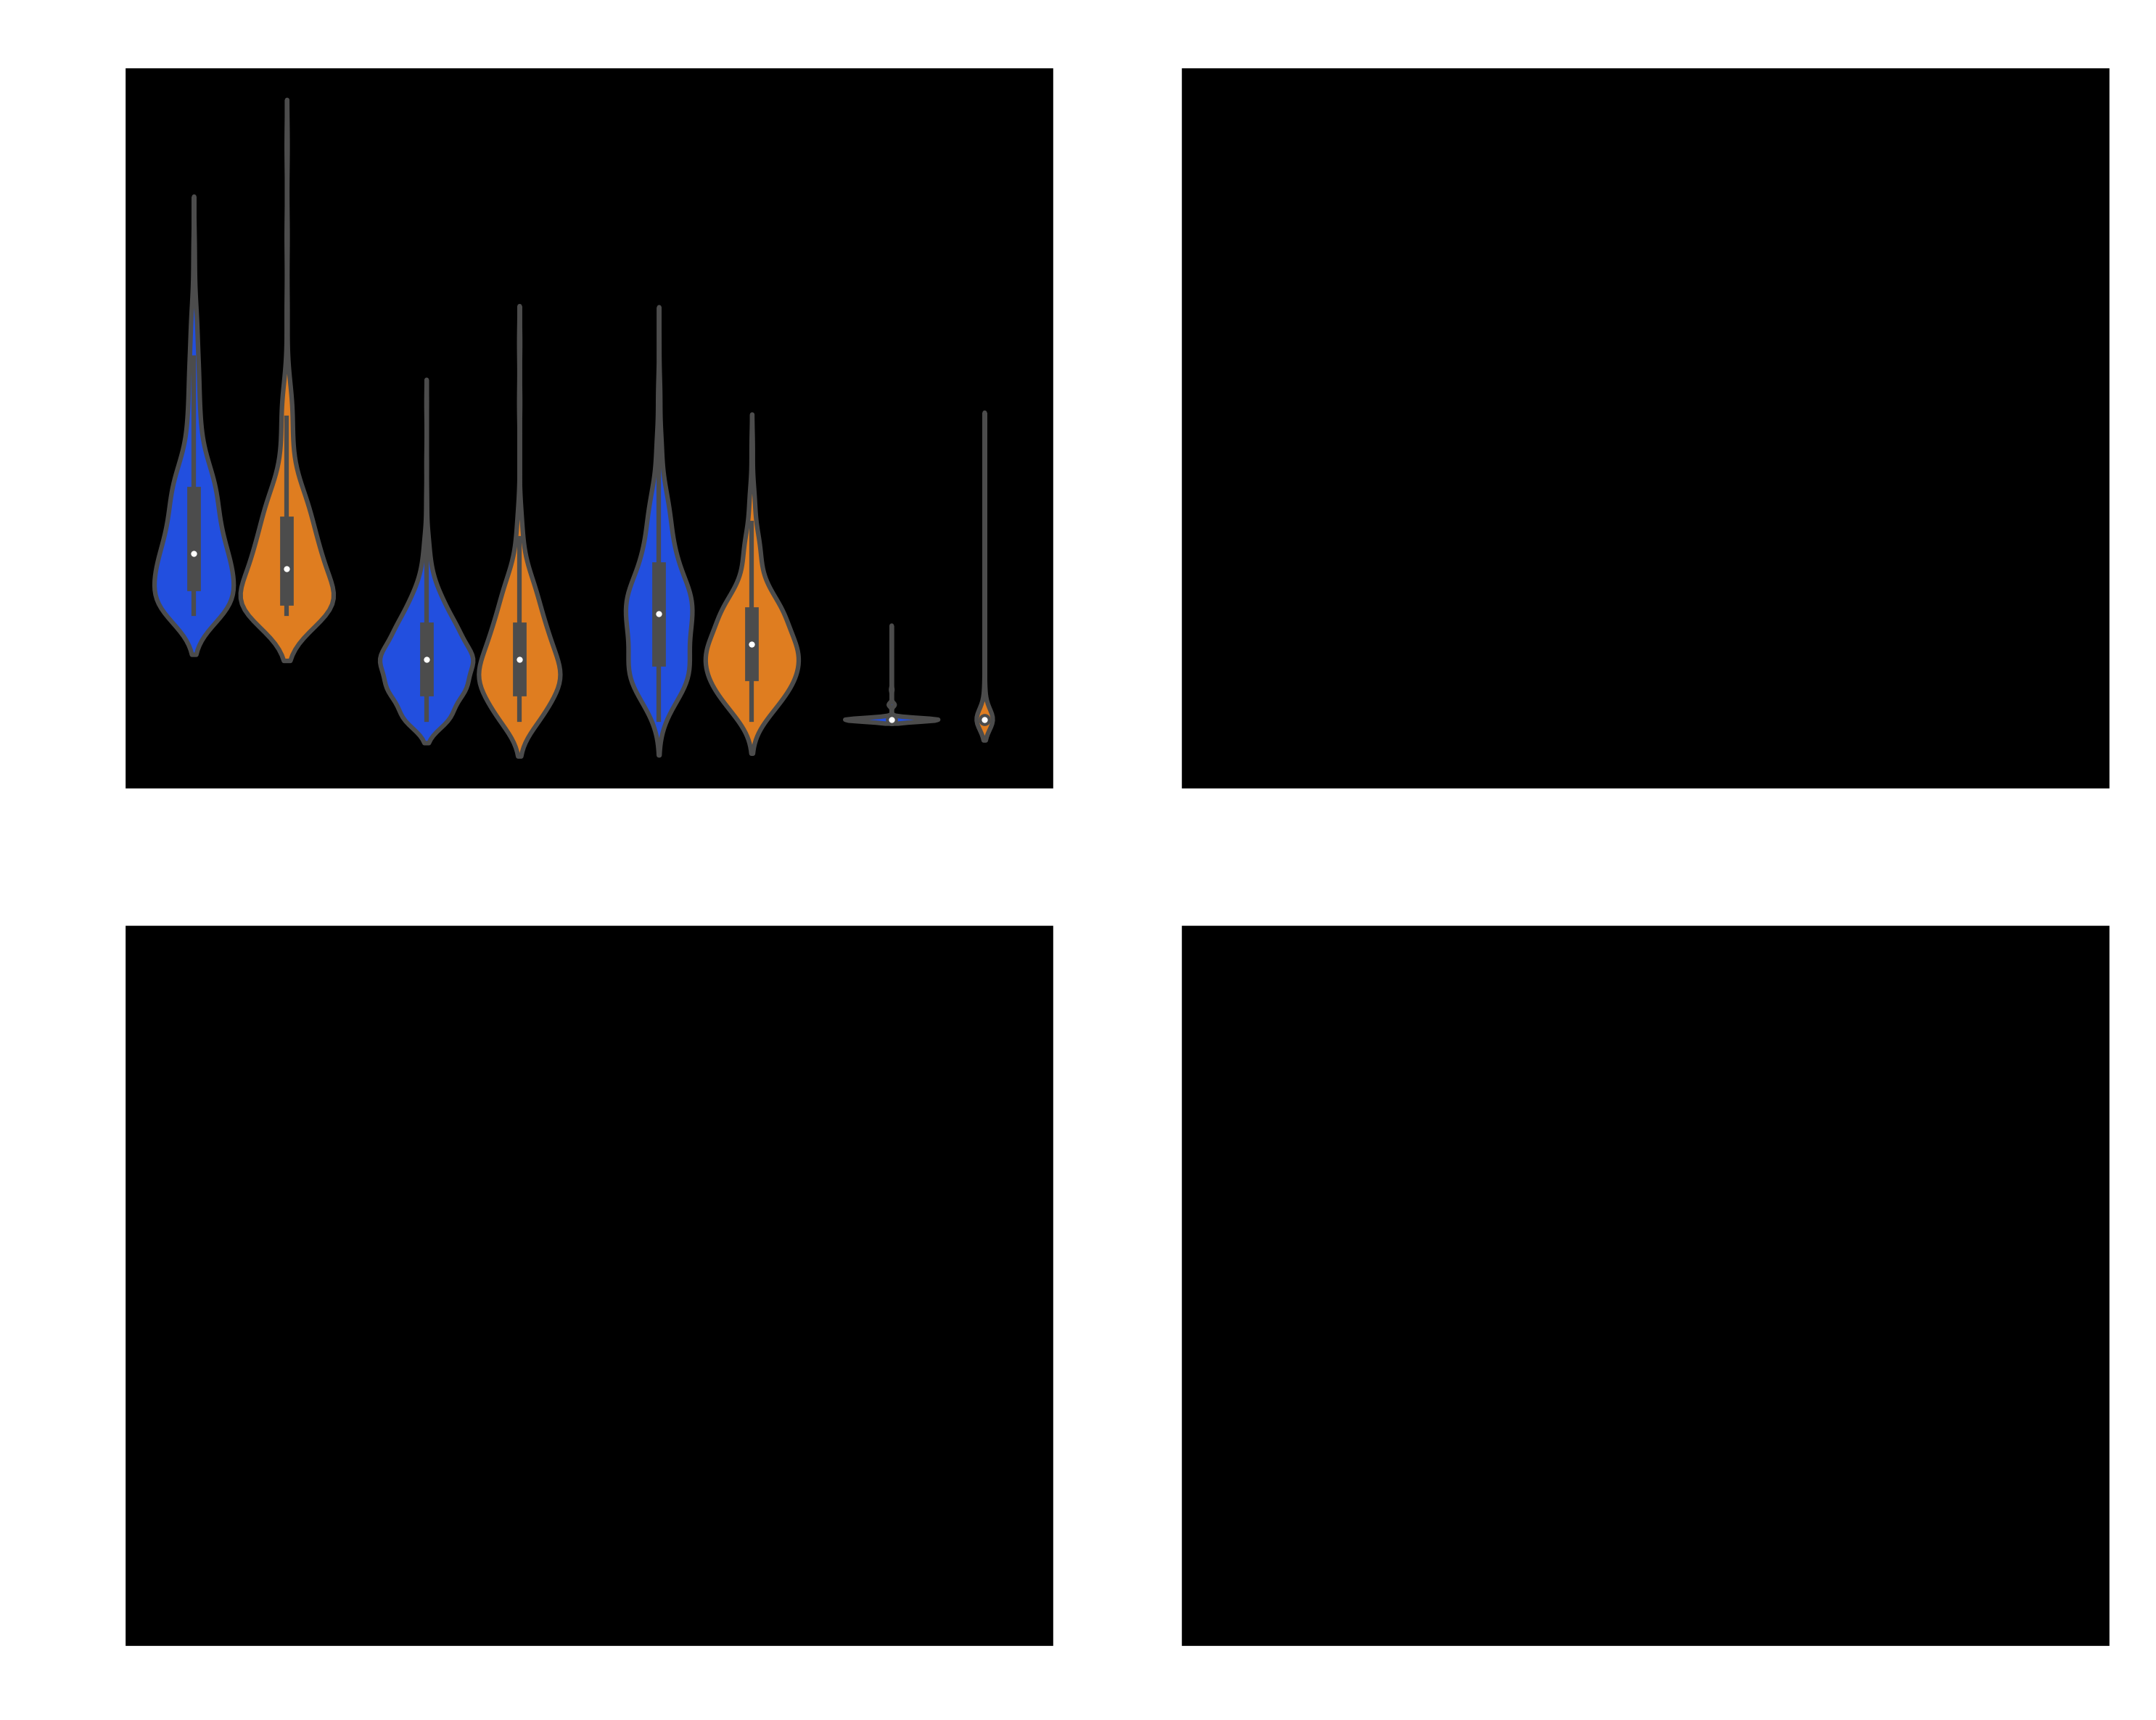

In [161]:
data = cbm5

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("dark_background")

fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=150, facecolor="w")
for i, cell in enumerate(["Progenitor cells", ]):
    ax = axs[np.unravel_index(i, (2, 2))]
    d= data[data.obs["MERFISH celltype"] == cell]

    df = pd.DataFrame(d.layers["Raw counts"], index=d.to_df().index, columns=d.to_df().columns)
    df["Ptbp1"] = d.obs["New_PTB"]
    df["Treatment"] = d.obs["Treatment"]
    df["MERFISH celltype"] = d.obs["MERFISH celltype"]

    df = df[df["Ptbp1"] >= df["Ptbp1"].mean()]

    # data
    genes = [ 
        "Ptbp1",
        "Rest", 
        "Rtn4",
        "Dcx",
        ]

    df_melted = df.melt(id_vars=['Treatment'], value_vars=genes)
    # sns.boxenplot(data=df_melted, x='variable', y='value', ax=ax, hue='Treatment',showfliers=False, hue_order=["Saline", "PTB-ASO"], palette="bright", k_depth="full")
    sns.violinplot(data=df_melted, x='variable', y='value', ax=ax, hue='Treatment',showfliers=False, hue_order=["Saline", "PTB-ASO"], palette="bright", k_depth="full")
    ax.legend([],[], frameon=False)
    ax.set_title(f"{cell}")
    ax.set_xlabel('Gene')
    ax.set_ylabel('Value')
    plt.tight_layout()

plt.savefig("./figures/alsdkjfalskdfja5.png", dpi=300, bbox_inches="tight", transparent=True)



/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_55855/3408246403.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_55855/3408246403.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_55855/3408246403.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


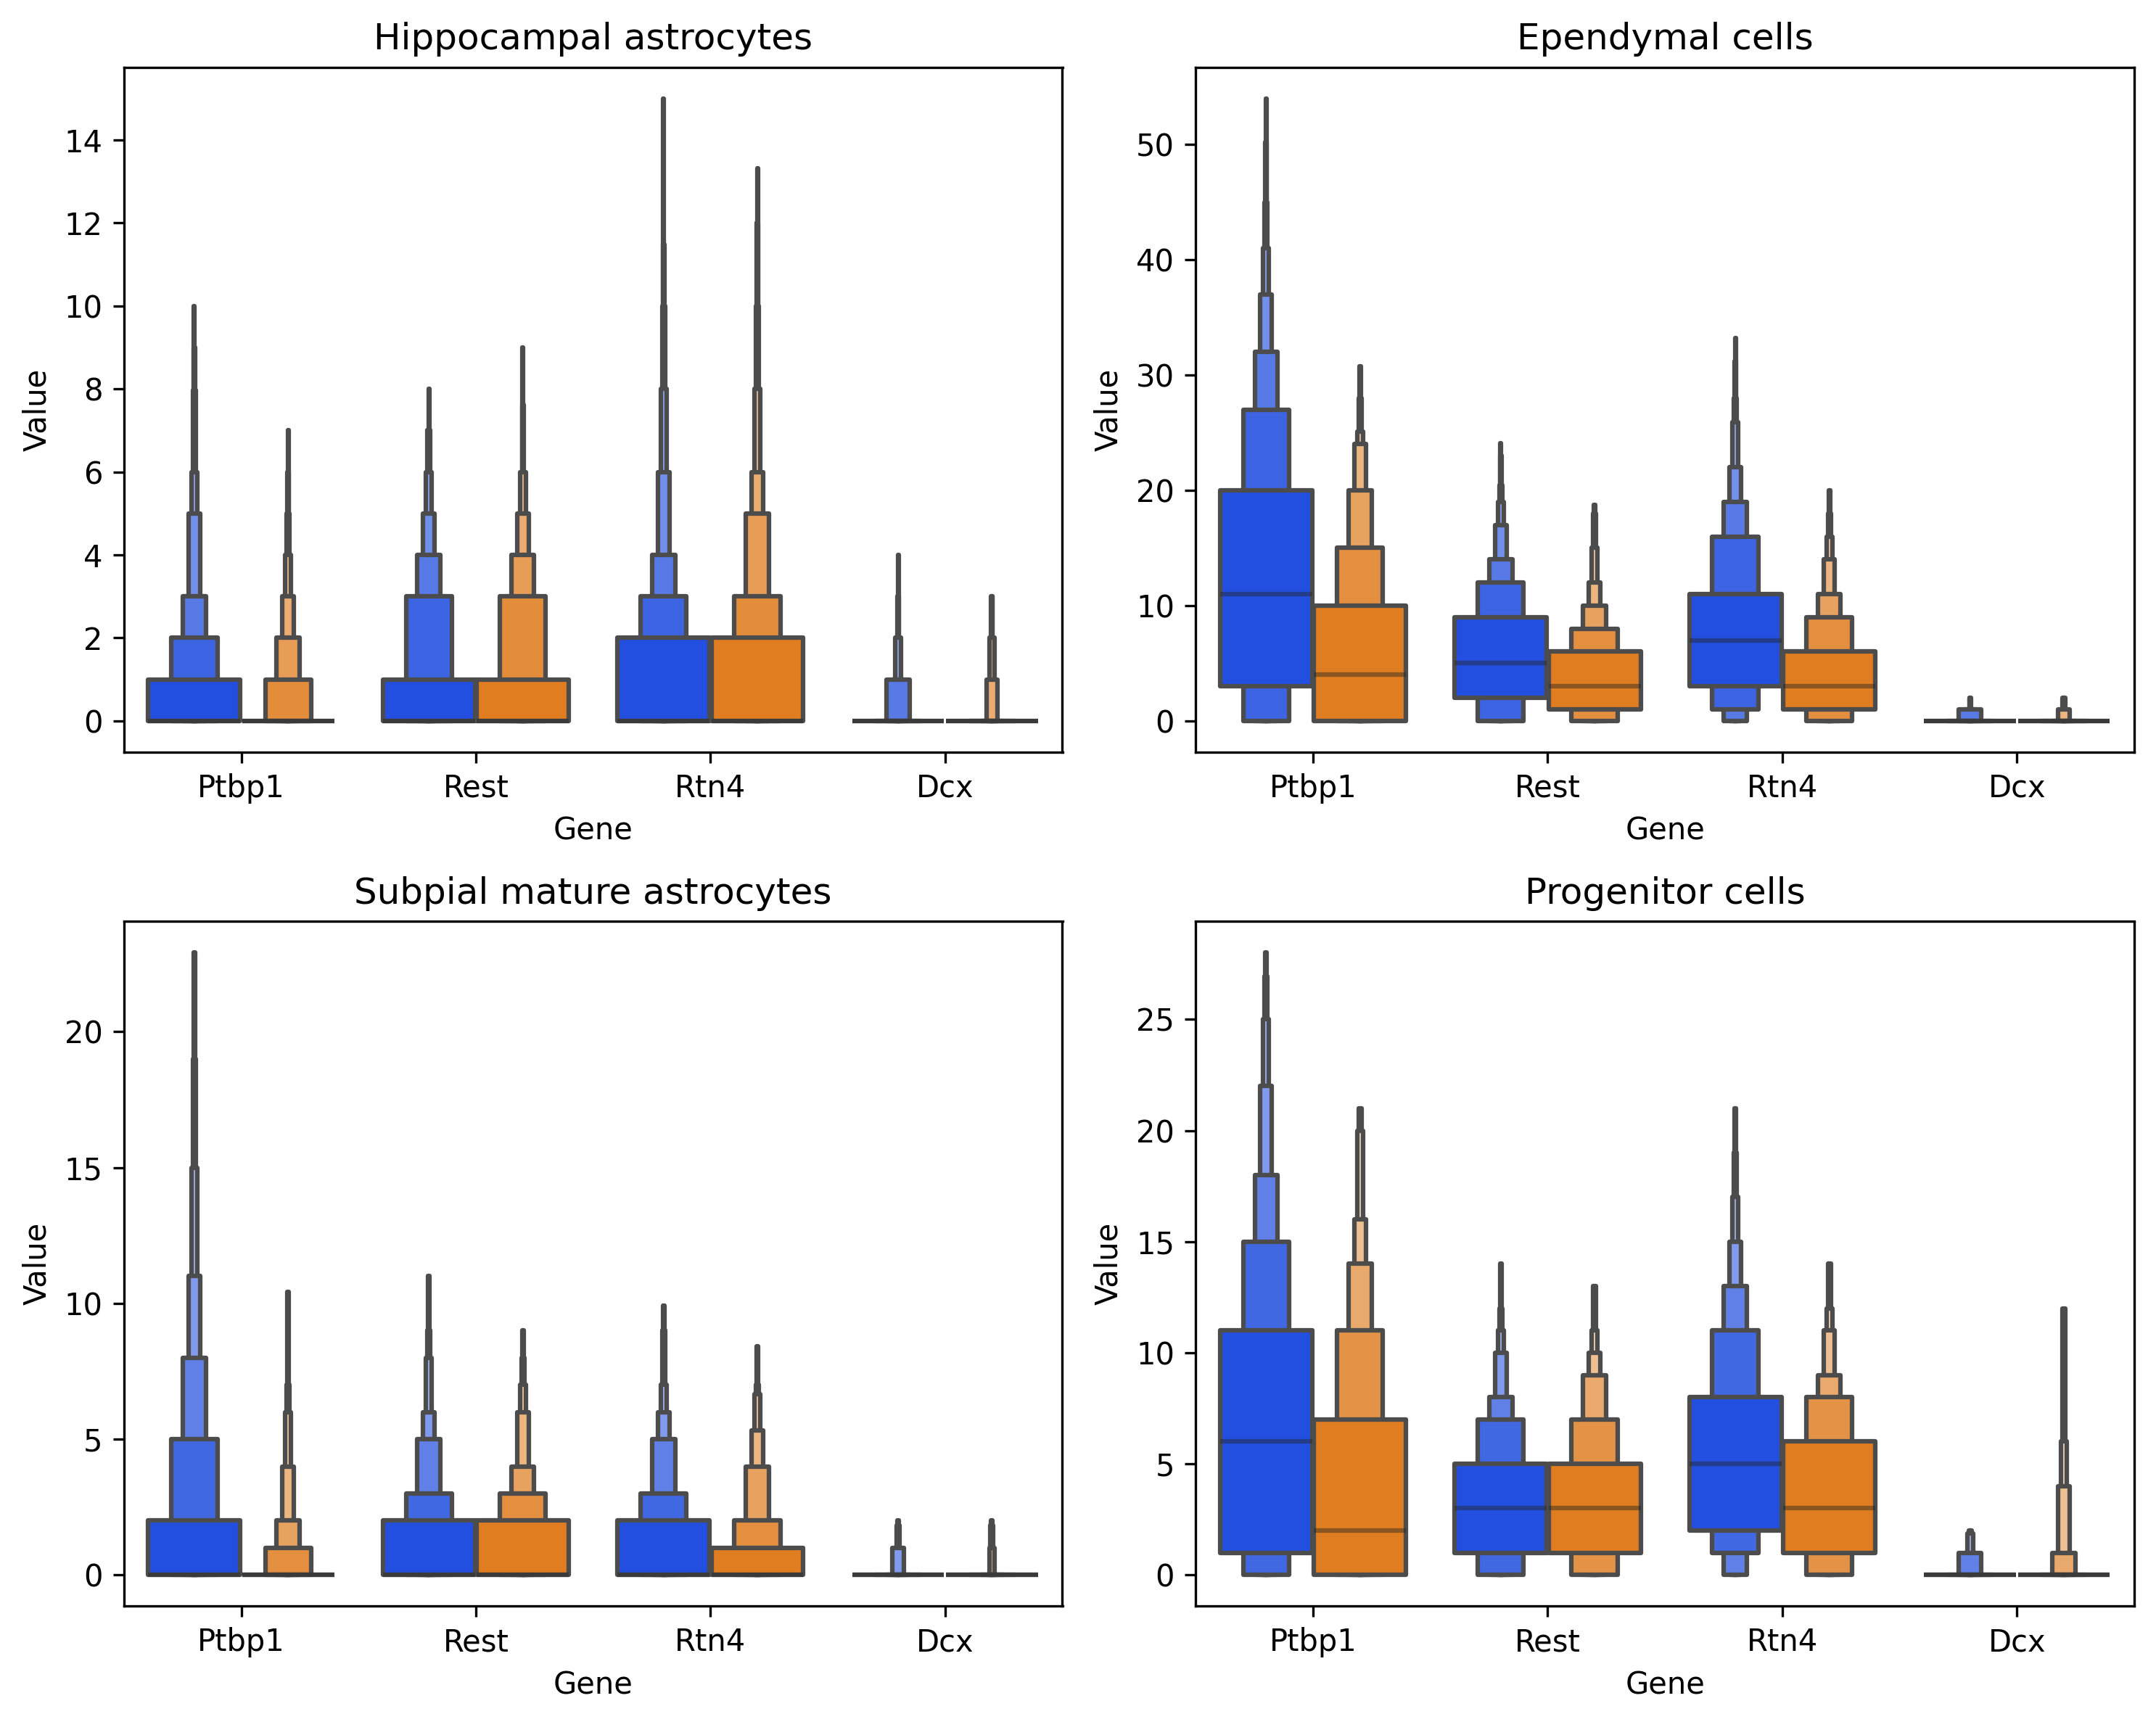

In [25]:
data = cbm5

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("default")

fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=150, facecolor="w")
for i, cell in enumerate(["Hippocampal astrocytes", "Ependymal cells", "Subpial mature astrocytes","Progenitor cells", ]):
    ax = axs[np.unravel_index(i, (2, 2))]
    d= data[data.obs["MERFISH celltype"] == cell]

    df = pd.DataFrame(d.layers["Raw counts"], index=d.to_df().index, columns=d.to_df().columns)
    df["Ptbp1"] = d.obs["New_PTB"]
    df["Treatment"] = d.obs["Treatment"]
    df["MERFISH celltype"] = d.obs["MERFISH celltype"]

    # data
    genes = [ 
        "Ptbp1",
        "Rest", 
        "Rtn4",
        "Dcx",
        ]

    df_melted = df.melt(id_vars=['Treatment'], value_vars=genes)
    sns.boxenplot(data=df_melted, x='variable', y='value', ax=ax, hue='Treatment',showfliers=False, hue_order=["Saline", "PTB-ASO"], palette="bright",)
    ax.legend([],[], frameon=False)
    ax.set_title(f"{cell}")
    ax.set_xlabel('Gene')
    ax.set_ylabel('Value')
    plt.tight_layout()

# plt.savefig("./figures/alsdkjfalskdfja8.png", dpi=300, bbox_inches="tight", transparent=True)

# Supplemental Figure 4

# Figure A

Heat map Pearson correlation plot between saline and PTBP-ASO injected mice comparing three different neuronal types including the DG hippocampal neurons, CA1 neurons and L3 cortical neurons

### Get DG hippocampal neurons, CA1 neurons and L3 cortical neurons Data

In [11]:
sub_cbm5 = cbm5[cbm5.obs["MERFISH celltype"].isin(["Mature DG neurons", "CA1 neurons", "L3 neurons"])]
ptbsub = sub_cbm5[sub_cbm5.obs["Treatment"] == "PTB-ASO"]
salsub = sub_cbm5[sub_cbm5.obs["Treatment"] == "Saline"]
print(ptbsub)
salsub

View of AnnData object with n_obs × n_vars = 4305 × 223
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'leiden_denovo', 'Experiment', 'Age', 'Section', 'Mouse', 'Treatment', 'Timepoint', 'Ptbp1', 'MERFISH celltype', 'New_PTB'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Mouse_colors', 'Section_colors', 'Treatment_colors', 'leiden', 'leiden_colors', 'leiden_denovo_colors', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'X_umap_denovo', 'rep'
    varm: 'PCs'
    layers: 'Raw counts'
    obsp: 'connectivities', 'distances'


View of AnnData object with n_obs × n_vars = 6151 × 223
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'leiden_denovo', 'Experiment', 'Age', 'Section', 'Mouse', 'Treatment', 'Timepoint', 'Ptbp1', 'MERFISH celltype', 'New_PTB'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Mouse_colors', 'Section_colors', 'Treatment_colors', 'leiden', 'leiden_colors', 'leiden_denovo_colors', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'X_umap_denovo', 'rep'
    varm: 'PCs'
    layers: 'Raw counts'
    obsp: 'connectivities', 'distances'

In [12]:
from scipy.stats import zscore
from scipy.stats import pearsonr

<Figure size 2250x2250 with 0 Axes>

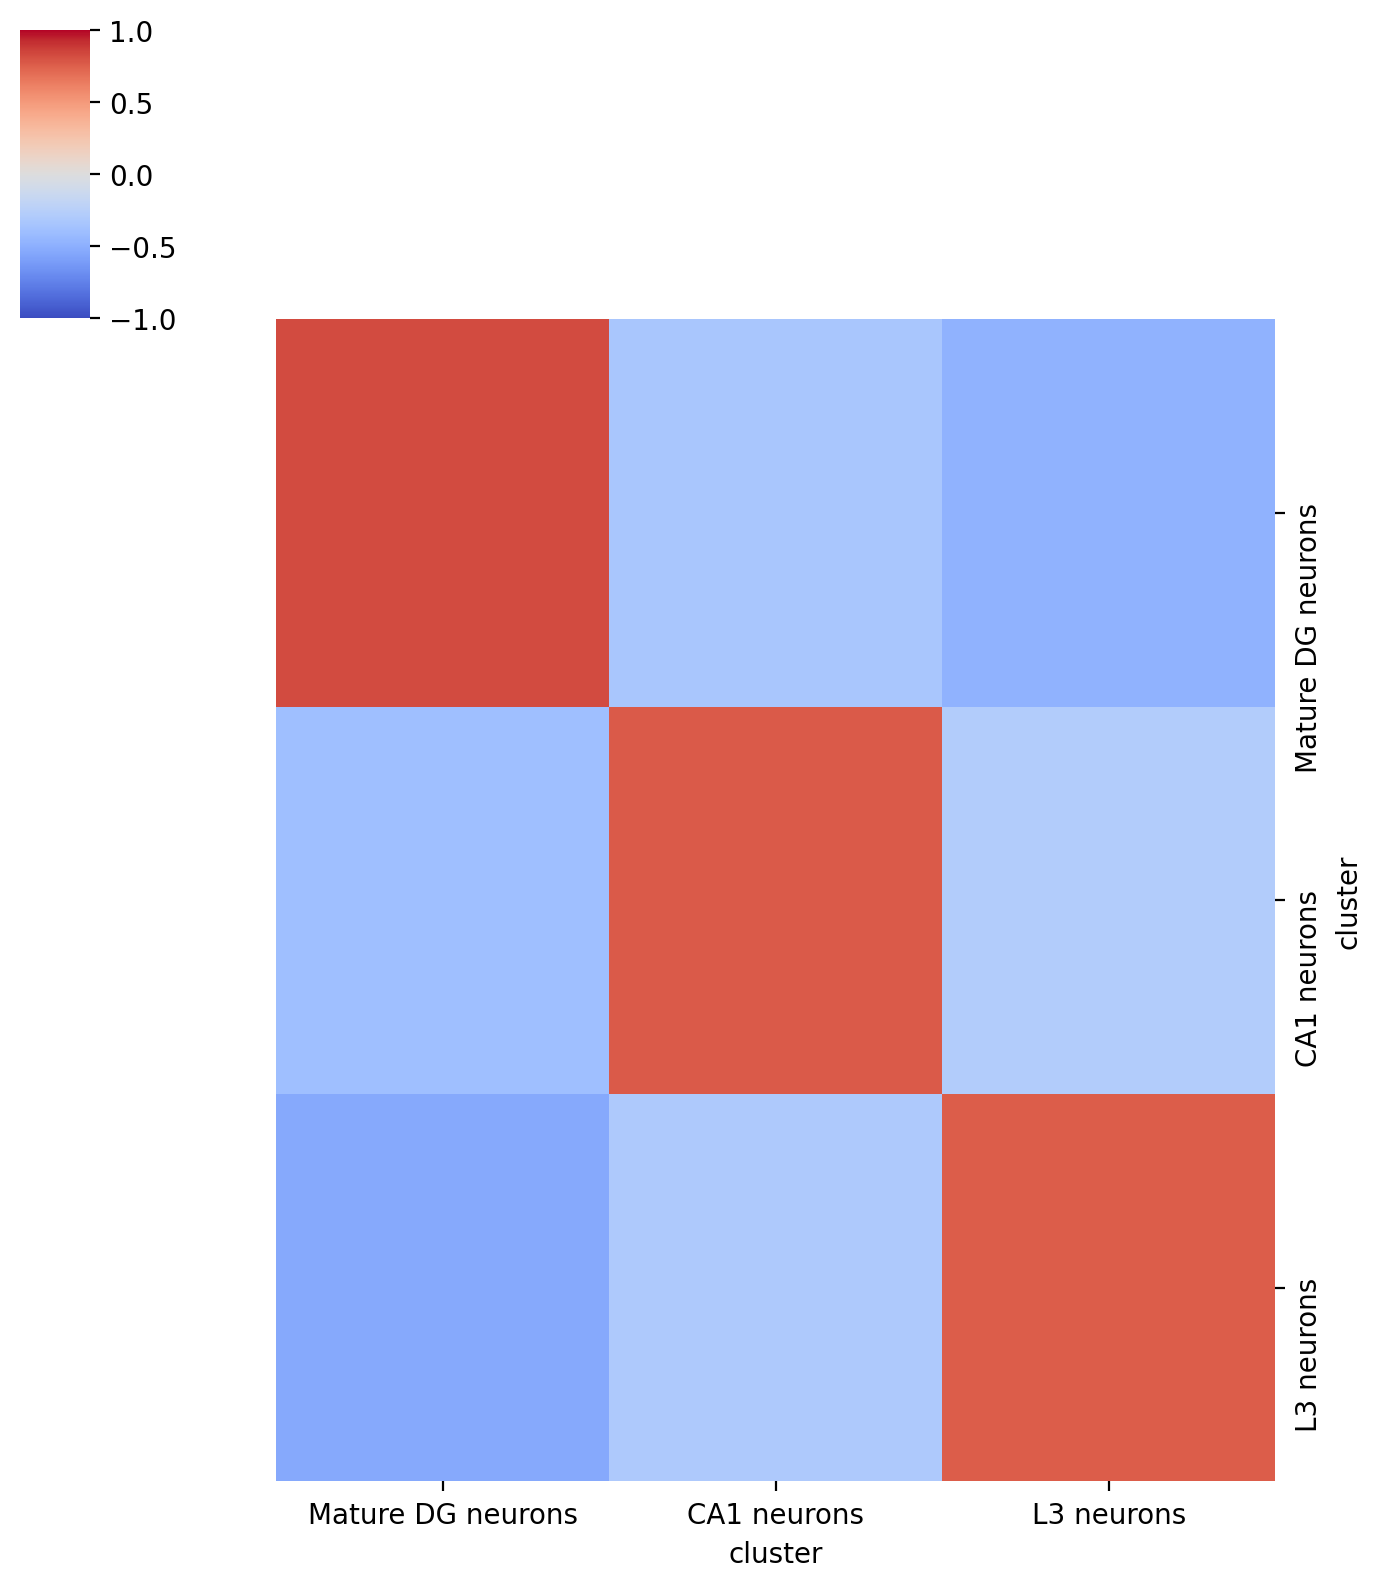

In [13]:
plt.style.use("default")
refdata = ptbsub
d = salsub

group = "MERFISH celltype"

common_genes = refdata.var_names.intersection(d.var_names)
cbmtemp = d[:,common_genes]
refdata = refdata[:,common_genes]

refdf = pd.DataFrame(data=refdata.layers["Raw counts"], columns=refdata.var_names, index=refdata.obs.index)
refdf["cluster"] = refdata.obs[group]
refdf["Ptbp1"] = refdata.obs["New_PTB"]
refmeans = refdf.groupby("cluster").mean()

cbmdf = pd.DataFrame(data=cbmtemp.layers["Raw counts"], columns=cbmtemp.var_names, index=cbmtemp.obs.index)
cbmdf["cluster"] = cbmtemp.obs[group]
cbmdf["Ptbp1"] = cbmtemp.obs["New_PTB"]
cbmmeans = cbmdf.groupby("cluster").mean()

refmeans = zscore(refmeans, axis=0)
cbmmeans = zscore(cbmmeans, axis=0)

# Get all the correlations
ps = []
for name1, row1 in cbmmeans.iterrows():
    ps_ = []
    for name2, row2 in refmeans.iterrows():
        ps_.append(pearsonr(row1, row2)[0])
    ps.append(ps_)
cordf = pd.DataFrame(ps, index=cbmmeans.index, columns=refmeans.index)


order_x = ["Mature DG neurons", "CA1 neurons", "L3 neurons"]
cordf = cordf[order_x]
cordf = cordf.reindex(order_x)

plt.figure(figsize=(15,15), dpi=150)

fig = sns.clustermap(cordf, cmap='coolwarm', vmax=1, vmin=-1, figsize=(7,8), yticklabels=True, xticklabels=True, row_cluster=False, col_cluster=False)


In [14]:
cordf

cluster,Mature DG neurons,CA1 neurons,L3 neurons
cluster,,,
Mature DG neurons,0.826946,-0.339381,-0.483715
CA1 neurons,-0.392780,0.766955,-0.283350
L3 neurons,-0.532115,-0.311245,0.759873


# Figure B

Dot plot representation of top 10 differentially expressed genes in the dentate gyrus, CA1, or L3 neurons in saline control and PTBP1-ASO injected mice.

In [15]:
cbm5 = sc.read("../DataF/fig2/CBM5_new_PTB.h5ad")

In [16]:
matdgcbm5 = cbm5[cbm5.obs["MERFISH celltype"] == "Mature DG neurons"]
matdgcbm5.uns['log1p']["base"] = None
matdgcbm5.obs = matdgcbm5.obs.sort_values("Treatment", ascending=False)



In [17]:
matdgcbm5.obs

,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,leiden,leiden_denovo,Experiment,Age,Section,Mouse,Treatment,Timepoint,Ptbp1,MERFISH celltype,New_PTB
cell_id,,,,,,,,,,,,,,,,
7970016,154,154,5.043425,2103.0,7.651596,14,9,CBM5,14 months,Mu12.1,Mu12,Saline,2 weeks,0,Mature DG neurons,0
7960032,142,142,4.962845,1572.0,7.360740,14,9,CBM5,14 months,Mu12.1,Mu12,Saline,2 weeks,0,Mature DG neurons,2
7960038,174,174,5.164786,3146.0,8.054205,14,9,CBM5,14 months,Mu12.1,Mu12,Saline,2 weeks,0,Mature DG neurons,4
7960043,79,79,4.382027,318.0,5.765191,14,9,CBM5,14 months,Mu12.1,Mu12,Saline,2 weeks,0,Mature DG neurons,0
7960044,144,144,4.976734,1863.0,7.530480,14,9,CBM5,14 months,Mu12.1,Mu12,Saline,2 weeks,0,Mature DG neurons,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2730117,143,143,4.969813,1843.0,7.519692,14,9,CBM5,14 months,Mu15.2,Mu15,PTB-ASO,2 weeks,3,Mature DG neurons,0
2730119,152,152,5.030438,1522.0,7.328437,14,9,CBM5,14 months,Mu15.2,Mu15,PTB-ASO,2 weeks,0,Mature DG neurons,5
2730120,155,155,5.049856,1320.0,7.186144,14,9,CBM5,14 months,Mu15.2,Mu15,PTB-ASO,2 weeks,0,Mature DG neurons,0


/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


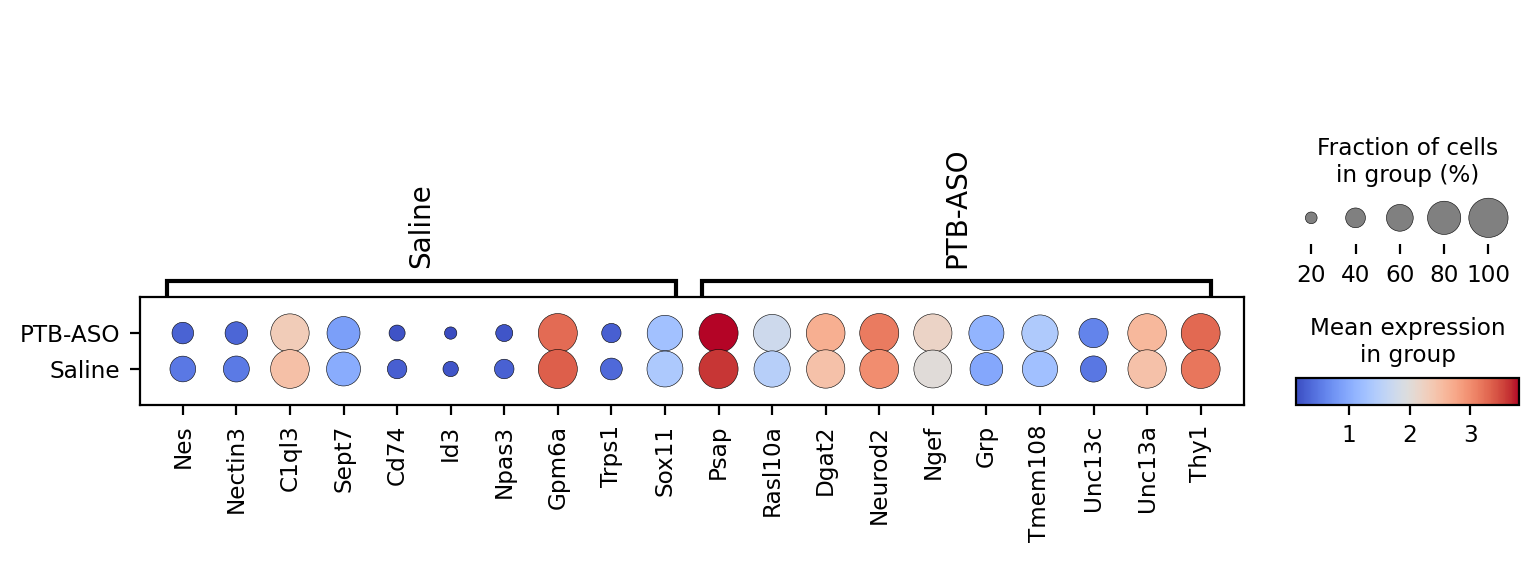

In [18]:
sc.tl.rank_genes_groups(matdgcbm5, 'Treatment')
sc.tl.dendrogram(matdgcbm5, groupby="Treatment")
sc.pl.rank_genes_groups_dotplot(matdgcbm5,n_genes=10, cmap="coolwarm", groups=["Saline", "PTB-ASO"])

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


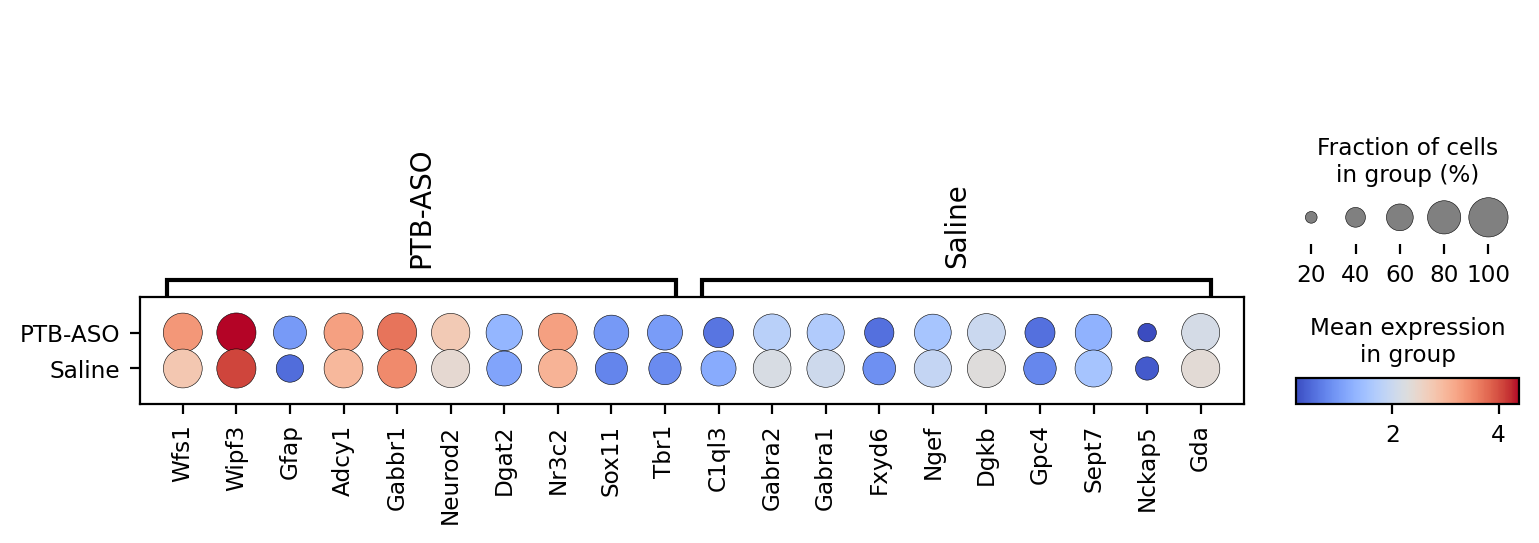

In [19]:
ca1cbm5 = cbm5[cbm5.obs["MERFISH celltype"] == "CA1 neurons"]
ca1cbm5.uns['log1p']["base"] = None
sc.tl.rank_genes_groups(ca1cbm5, 'Treatment')
sc.tl.dendrogram(ca1cbm5, groupby="Treatment")
sc.pl.rank_genes_groups_dotplot(ca1cbm5,n_genes=10, cmap="coolwarm")


/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


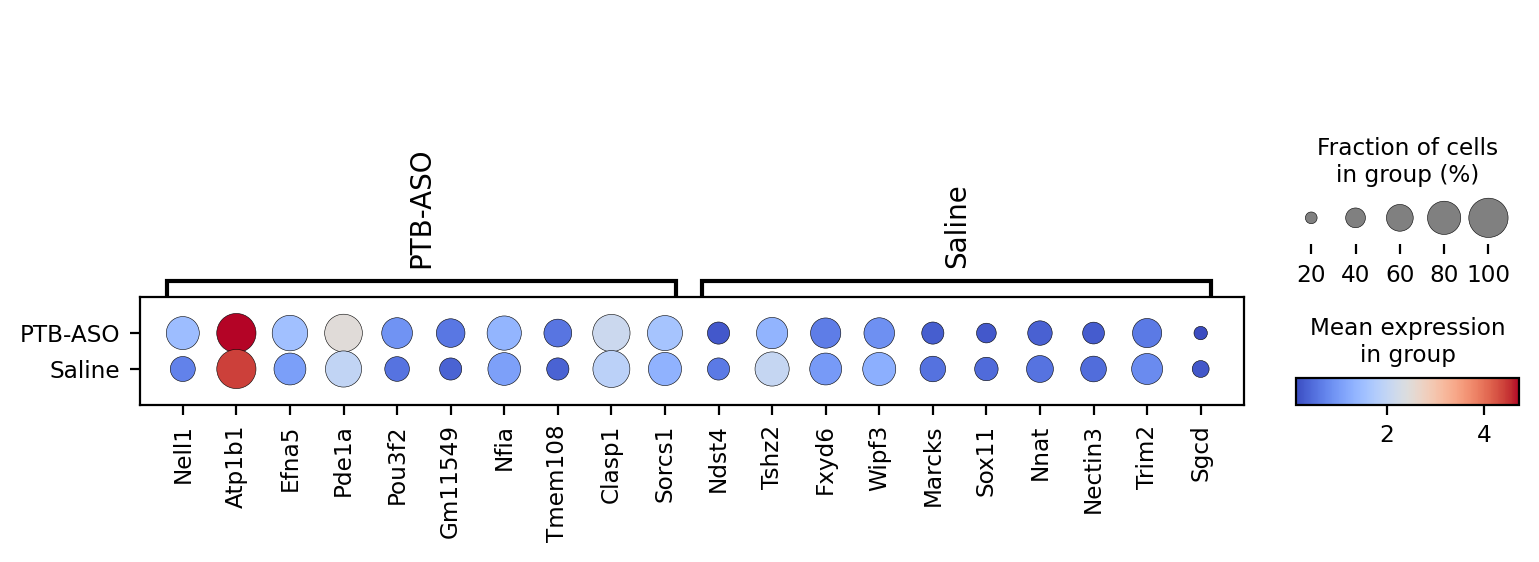

In [20]:
l3cbm5 = cbm5[cbm5.obs["MERFISH celltype"] == "L3 neurons"]
l3cbm5.uns['log1p']["base"] = None
sc.tl.rank_genes_groups(l3cbm5, 'Treatment')
sc.tl.dendrogram(l3cbm5, groupby="Treatment")
sc.pl.rank_genes_groups_dotplot(l3cbm5,n_genes=10, cmap="coolwarm")


# Figure C

Box plots quantification of PTBP1, SOX11, TBR1, GFAP, and CLASP1 mRNA levels within DG, CA1, or L3 neuronal population in saline (blue) and PTBP1-ASO injected mice. 

In [21]:
cbm5 = sc.read("../DataF/fig2/CBM5_new_PTB.h5ad")

/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_55855/1616790858.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_55855/1616790858.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


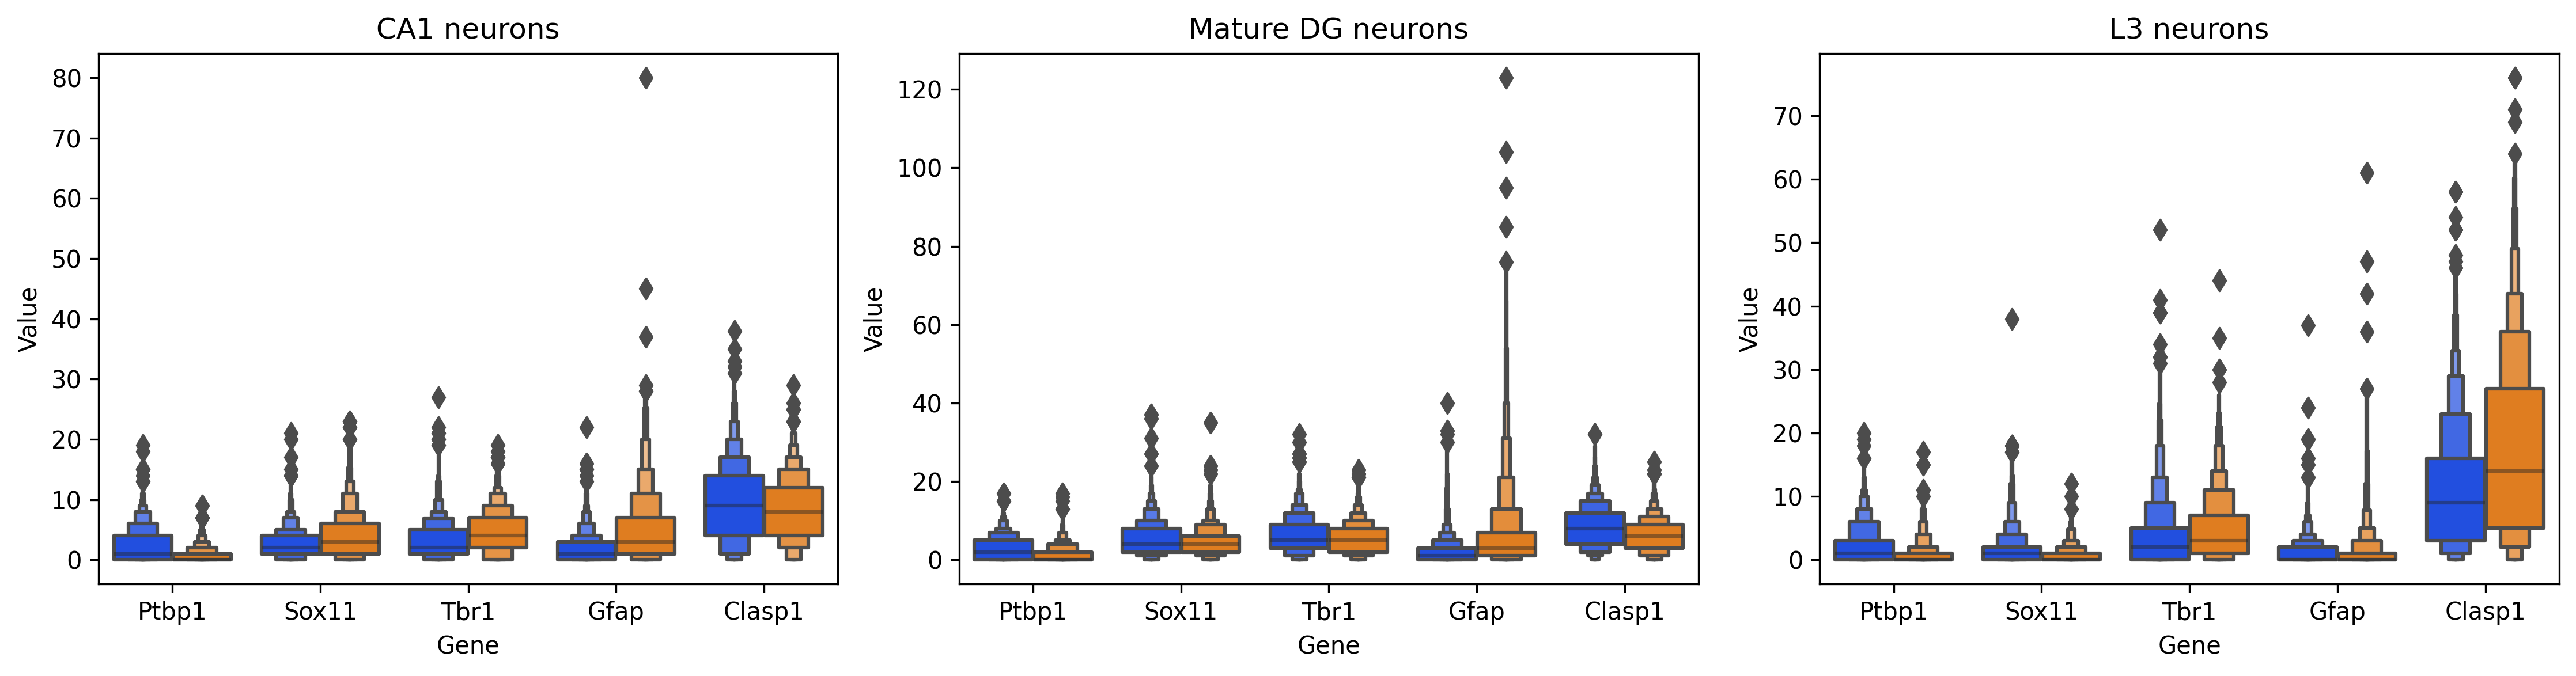

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("default")

fig, axs = plt.subplots(1, 3, figsize=(15, 4), dpi=150, facecolor="w")
for i, cell in enumerate(["CA1 neurons", "Mature DG neurons", "L3 neurons"]):
    ax = axs[i]
    
    d = cbm5[cbm5.obs["MERFISH celltype"] == cell]

    df = pd.DataFrame(d.layers["Raw counts"], index=d.to_df().index, columns=d.to_df().columns)
    df["Ptbp1"] = d.obs["New_PTB"]
    df["Treatment"] = d.obs["Treatment"]
    df["MERFISH celltype"] = d.obs["MERFISH celltype"]

    # data
    genes = [ 
        "Ptbp1",
        'Sox11',
        'Tbr1',
        "Gfap",
        "Clasp1",
        ]

    df_melted = df.melt(id_vars=['Treatment'], value_vars=genes)
    sns.boxenplot(data=df_melted, x='variable', y='value', hue="Treatment", hue_order=["Saline", "PTB-ASO"], ax=ax, showfliers=True, palette="bright")
    ax.legend([],[], frameon=False)
    ax.set_title(f"{cell}")
    ax.set_xlabel('Gene')
    ax.set_ylabel('Value')

    plt.tight_layout()